### Name: Archisha Panda
### Roll No: 2022111019

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Question 1: Lenna’s Plight

In [2]:
# Quantization of images
def quantize_image(image_array,n_bits):
    levels = 2 ** n_bits
    quantization_factor = 256 // levels
    quantized_image = (image_array // quantization_factor) * quantization_factor
    return quantized_image

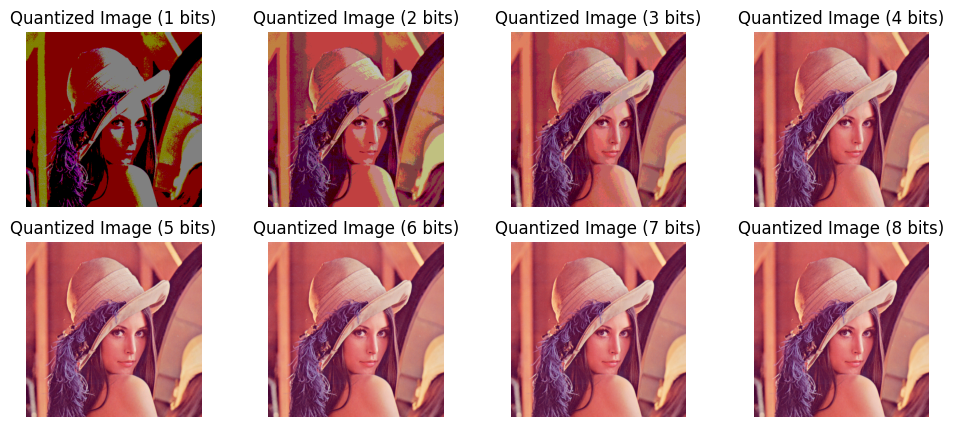

In [3]:
filepath = "../src_img/Lenna.png"
image = cv2.imread(filepath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

quantized_images = [quantize_image(image,i) for i in range(1,9)]

plt.figure(figsize=(12, 5))
for index, quant_image in enumerate(quantized_images):
    cv2.imwrite(f"../out_img/Lena_{index+1}_quantised.png",cv2.cvtColor(quant_image,cv2.COLOR_RGB2BGR))
    plt.subplot(2, 4, index+1)
    plt.title(f'Quantized Image ({index+1} bits)')
    plt.imshow(quant_image)
    plt.axis('off')
plt.show()

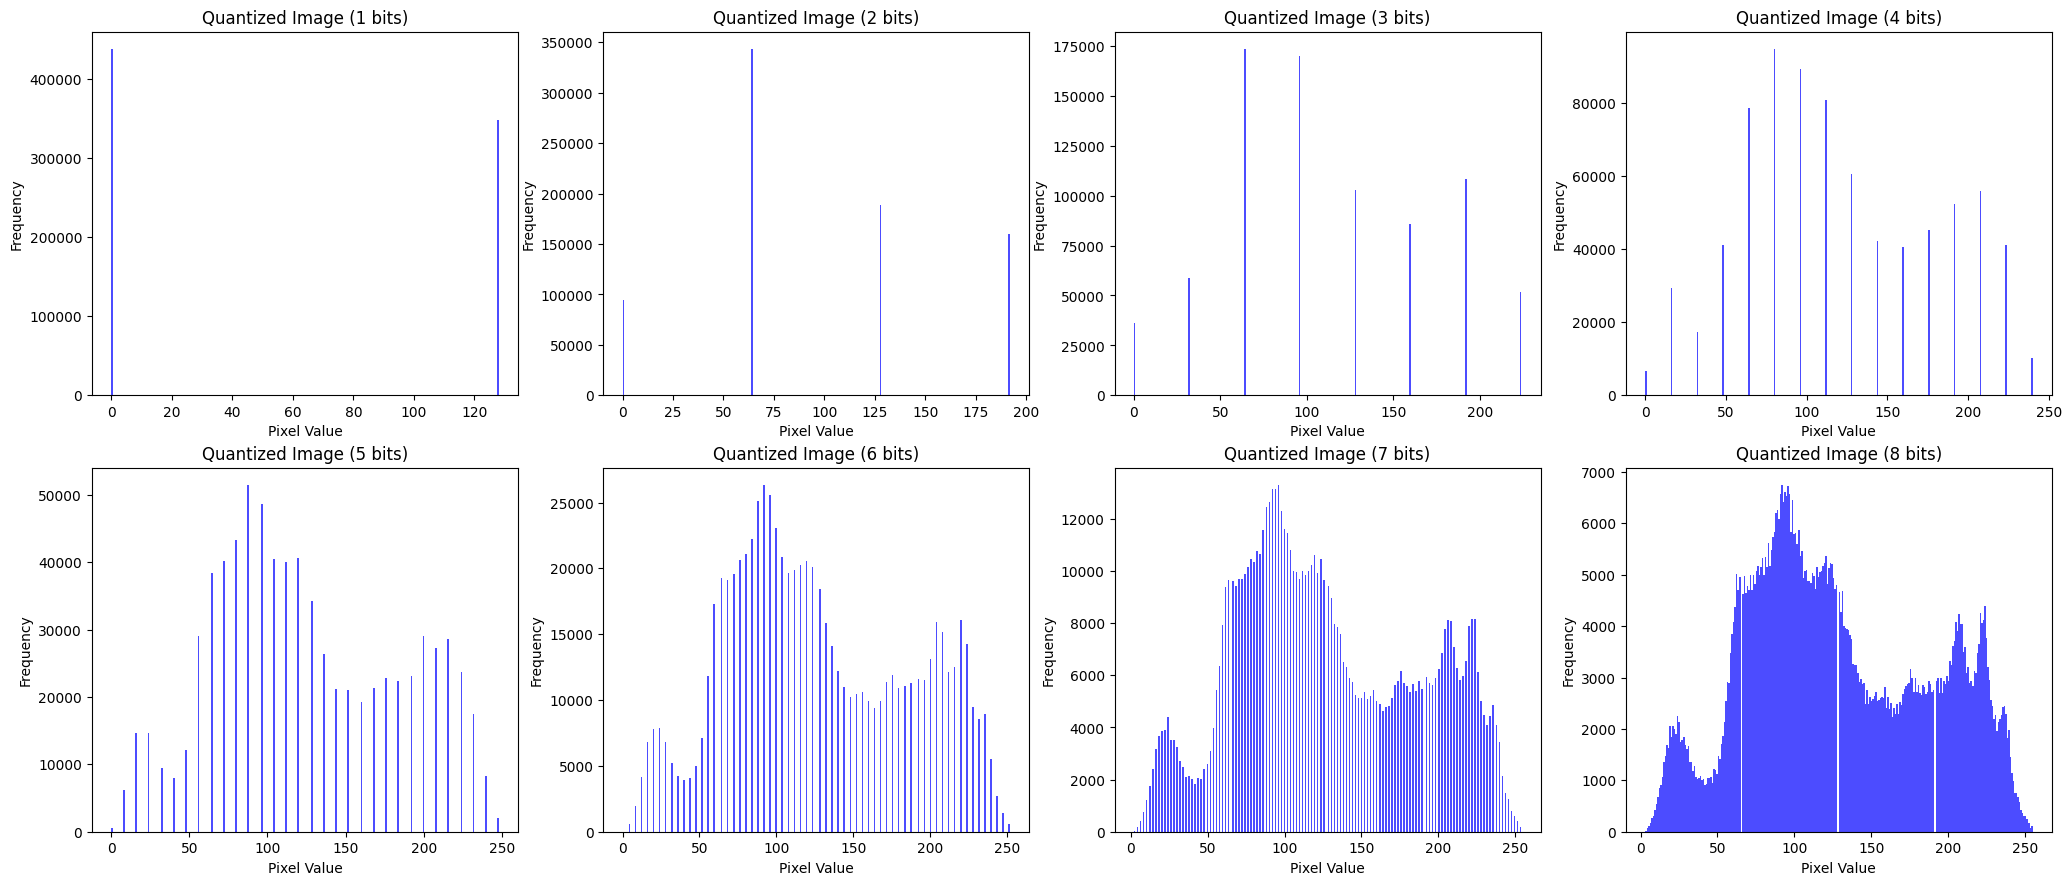

In [4]:
# Plot histograms for all the quantized images
plt.figure(figsize=(20, 10))
for i in range(len(quantized_images)):
    quantized_pixels = quantized_images[i].flatten() 

    plt.subplot(2,4,i+1)
    plt.hist(quantized_pixels, bins=256, color='blue', alpha=0.7)
    plt.title(f'Quantized Image ({i+1} bits)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.subplots_adjust(left=0.01, right=0.99, top=0.9, bottom=0.1)
plt.show()

### Effects Of Quantization
- As number of bits per channel per pixel is reduced, fewer colors are available. Thus smooth gradients are replaced by steps or bands of color. Instead of a smooth transition, you get distinct lines where the color jumps from one level to another.
- Some details might be lost since originally they were distinct but now after quantization, they are mapped to the same value.

# Question 2: Sorry, this is a long one

### Subtask 1

In [5]:
def histequalize(image):
    # Flatten the image
    flat_image = image.flatten()

    # Form the histogram
    histogram, bins = np.histogram(flat_image, bins=256, range=[0,256])

    # Calculate the pdf for each pixel intensity
    pdf_img = histogram / histogram.sum()

    # Calculate the cdf
    cdf_img = pdf_img.cumsum()

    # Multiply by 255 to trnasform pixel range from [0,1] to [0,255]
    cdf_eq = np.round(cdf_img * 255, 0)

    # Transformation T(r) - rounding off the cdf till that intensity to nearest integer
    equal_image = cdf_eq[flat_image]

    # Reshaping to bring image back to color image format
    equal_image = equal_image.reshape(image.shape)
    
    # Clipping to ensure all values are in range [0,255]
    equal_image = np.clip(equal_image, 0, 255).astype(np.uint8)
    
    return equal_image    

### Subtask 2

In [6]:
def plot_histogram(image,color):
    plt.hist(image.flatten(), bins=256, range=[0, 256], color=color, alpha=0.7)
    plt.title('Image Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)

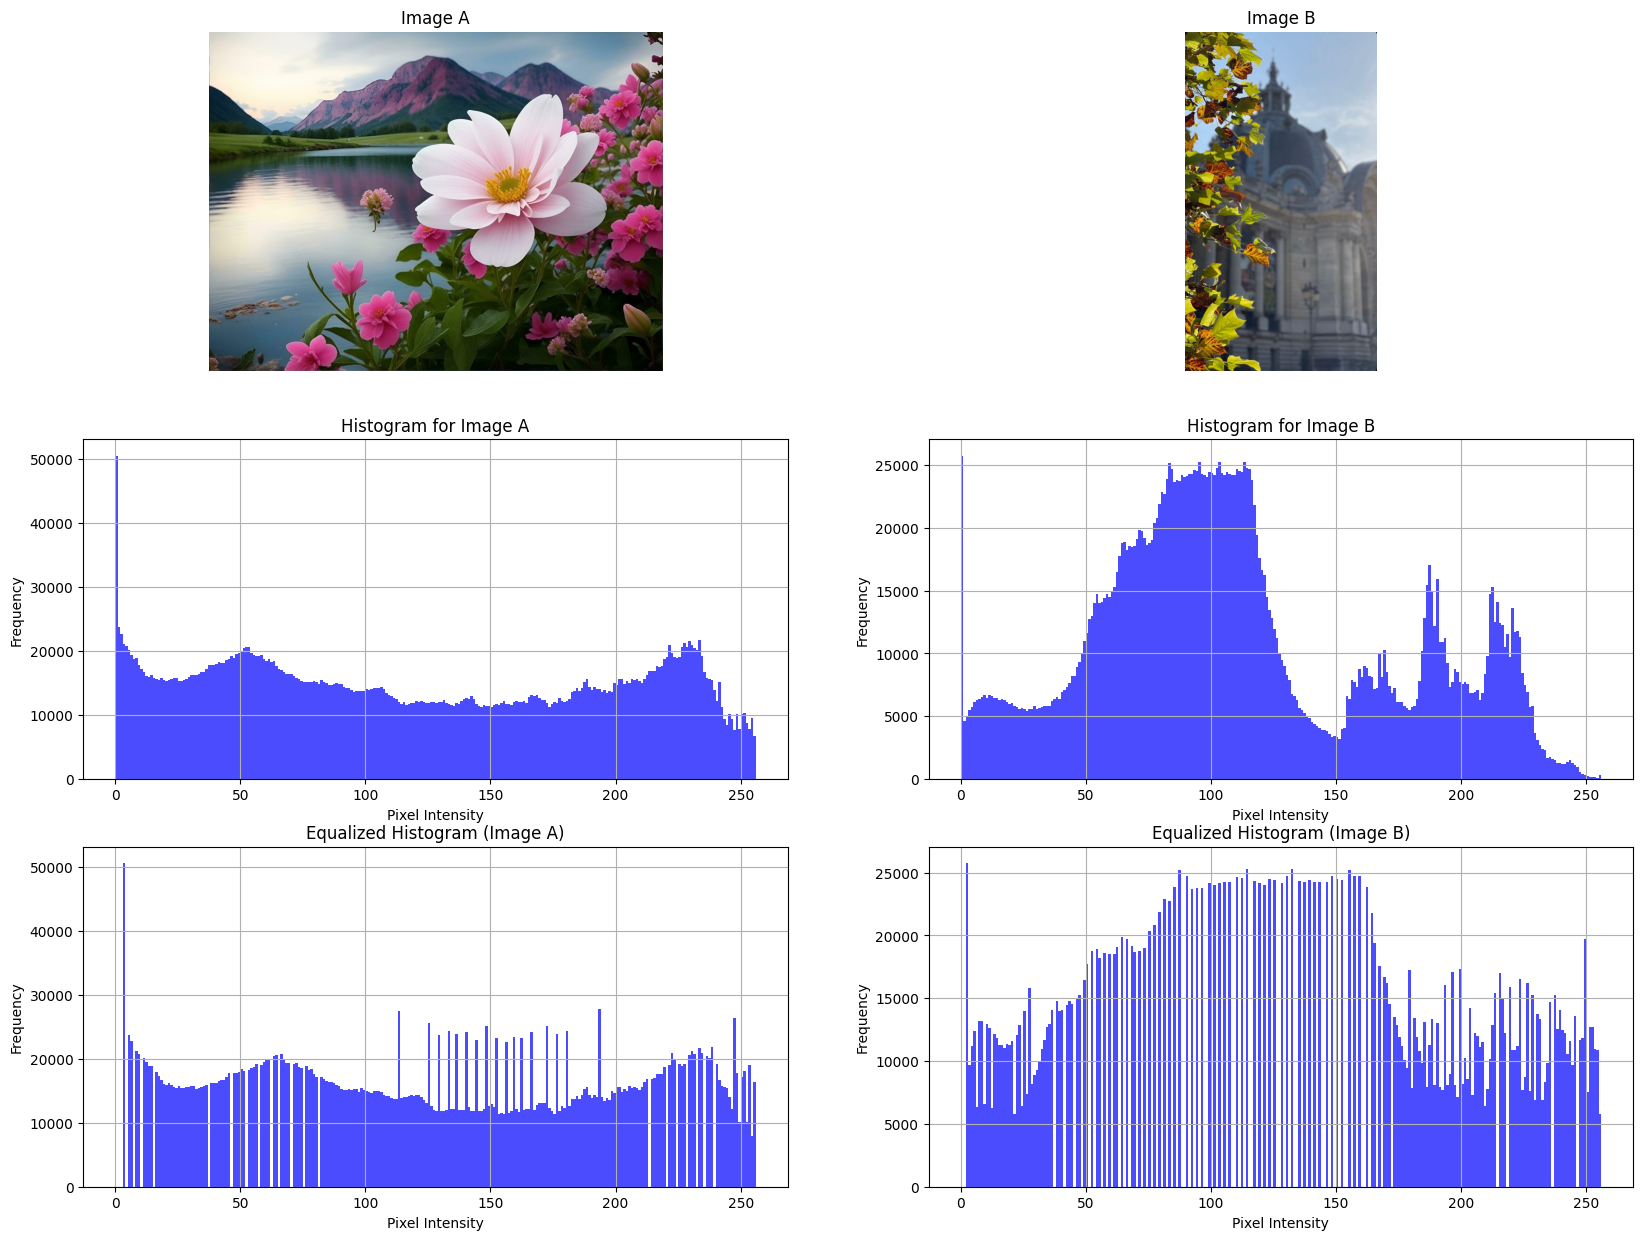

In [7]:
A_path = "../src_img/A.jpg"
B_path = "../src_img/image.jpg"

A_img = cv2.imread(A_path)
A_img = cv2.cvtColor(A_img, cv2.COLOR_BGR2RGB)

B_img = cv2.imread(B_path)
B_img = cv2.cvtColor(B_img, cv2.COLOR_BGR2RGB)

equal_image_A = histequalize(A_img)
equal_image_B = histequalize(B_img)

plt.figure(figsize=(20, 15))

plt.subplot(3,2,1)
plt.imshow(A_img)
plt.title("Image A")
plt.axis('off')

plt.subplot(3,2,2)
plt.imshow(B_img)
plt.title("Image B")
plt.axis('off')

plt.subplot(3,2,3)
plot_histogram(A_img,'blue')
plt.title("Histogram for Image A")

plt.subplot(3,2,4)
plot_histogram(B_img,'blue')
plt.title("Histogram for Image B")

plt.subplot(3,2,5)
plot_histogram(equal_image_A,'blue')
plt.title("Equalized Histogram (Image A)")

plt.subplot(3,2,6)
plot_histogram(equal_image_B,'blue')
plt.title("Equalized Histogram (Image B)")

plt.show()

### Comment on whether this is good representation for a colored image’s histogram
No this is not a good way to represent a color image as we simply flatten all the pixels to convert it into a histogram. In this process, we add to the frequency of an intensity irrespective of its color. Hence we lose out on all information regarding the color distribution of the original image. When the image is restored after equalization, the vividness, hue of the colors in the image are likely to have changed.

### Subtask 3

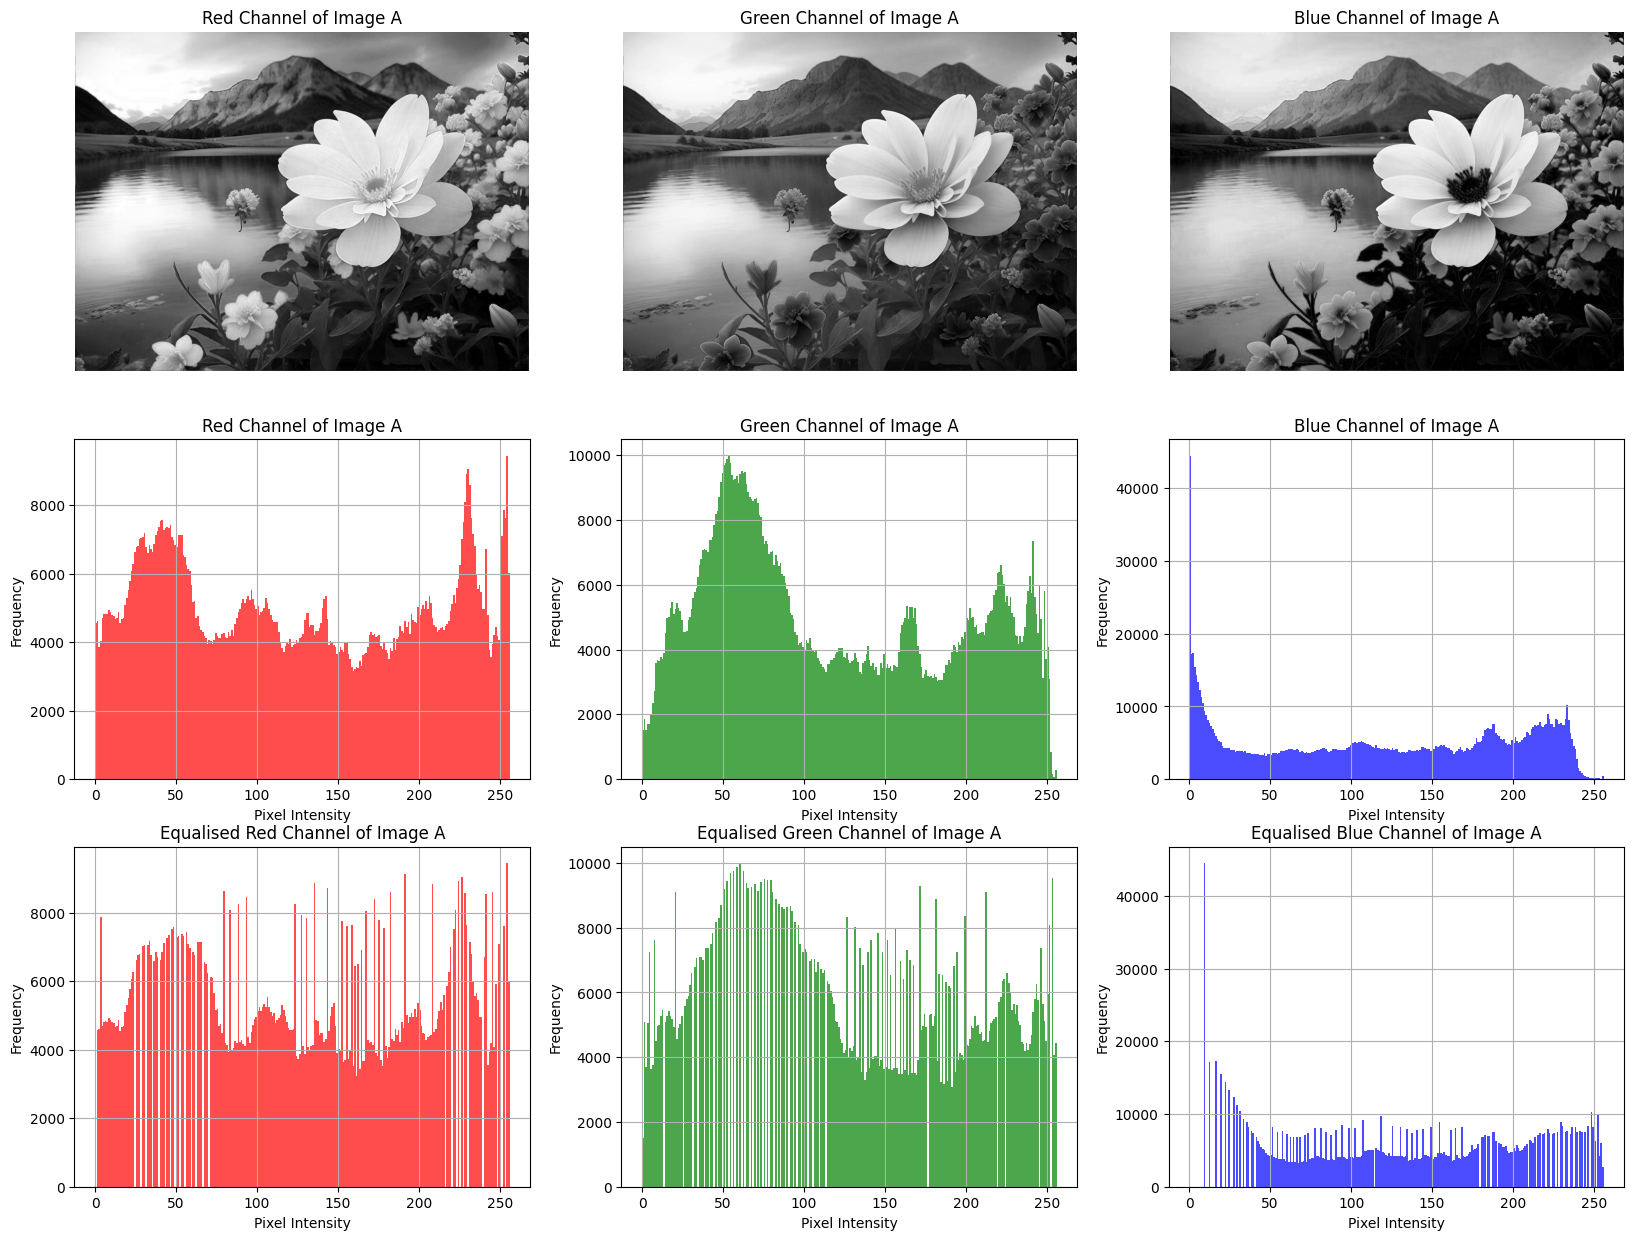

In [8]:
A_red_channel = A_img[:,:,0]
A_green_channel = A_img[:,:,1]
A_blue_channel = A_img[:,:,2]

A_red_equalised = histequalize(A_red_channel)
A_green_equalised = histequalize(A_green_channel)
A_blue_equalised = histequalize(A_blue_channel)

plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
plt.imshow(A_red_channel,cmap='gray')
plt.title("Red Channel of Image A")
plt.axis('off')

plt.subplot(3,3,2)
plt.imshow(A_green_channel,cmap='gray')
plt.title("Green Channel of Image A")
plt.axis('off')

plt.subplot(3,3,3)
plt.imshow(A_blue_channel,cmap='gray')
plt.title("Blue Channel of Image A")
plt.axis('off')

plt.subplot(3,3,4)
plot_histogram(A_red_channel,'red')
plt.title("Red Channel of Image A")

plt.subplot(3,3,5)
plot_histogram(A_green_channel,'green')
plt.title("Green Channel of Image A")

plt.subplot(3,3,6)
plot_histogram(A_blue_channel,'blue')
plt.title("Blue Channel of Image A")

plt.subplot(3,3,7)
plot_histogram(A_red_equalised,'red')
plt.title("Equalised Red Channel of Image A")

plt.subplot(3,3,8)
plot_histogram(A_green_equalised,'green')
plt.title("Equalised Green Channel of Image A")

plt.subplot(3,3,9)
plot_histogram(A_blue_equalised,'blue')
plt.title("Equalised Blue Channel of Image A")

plt.show()

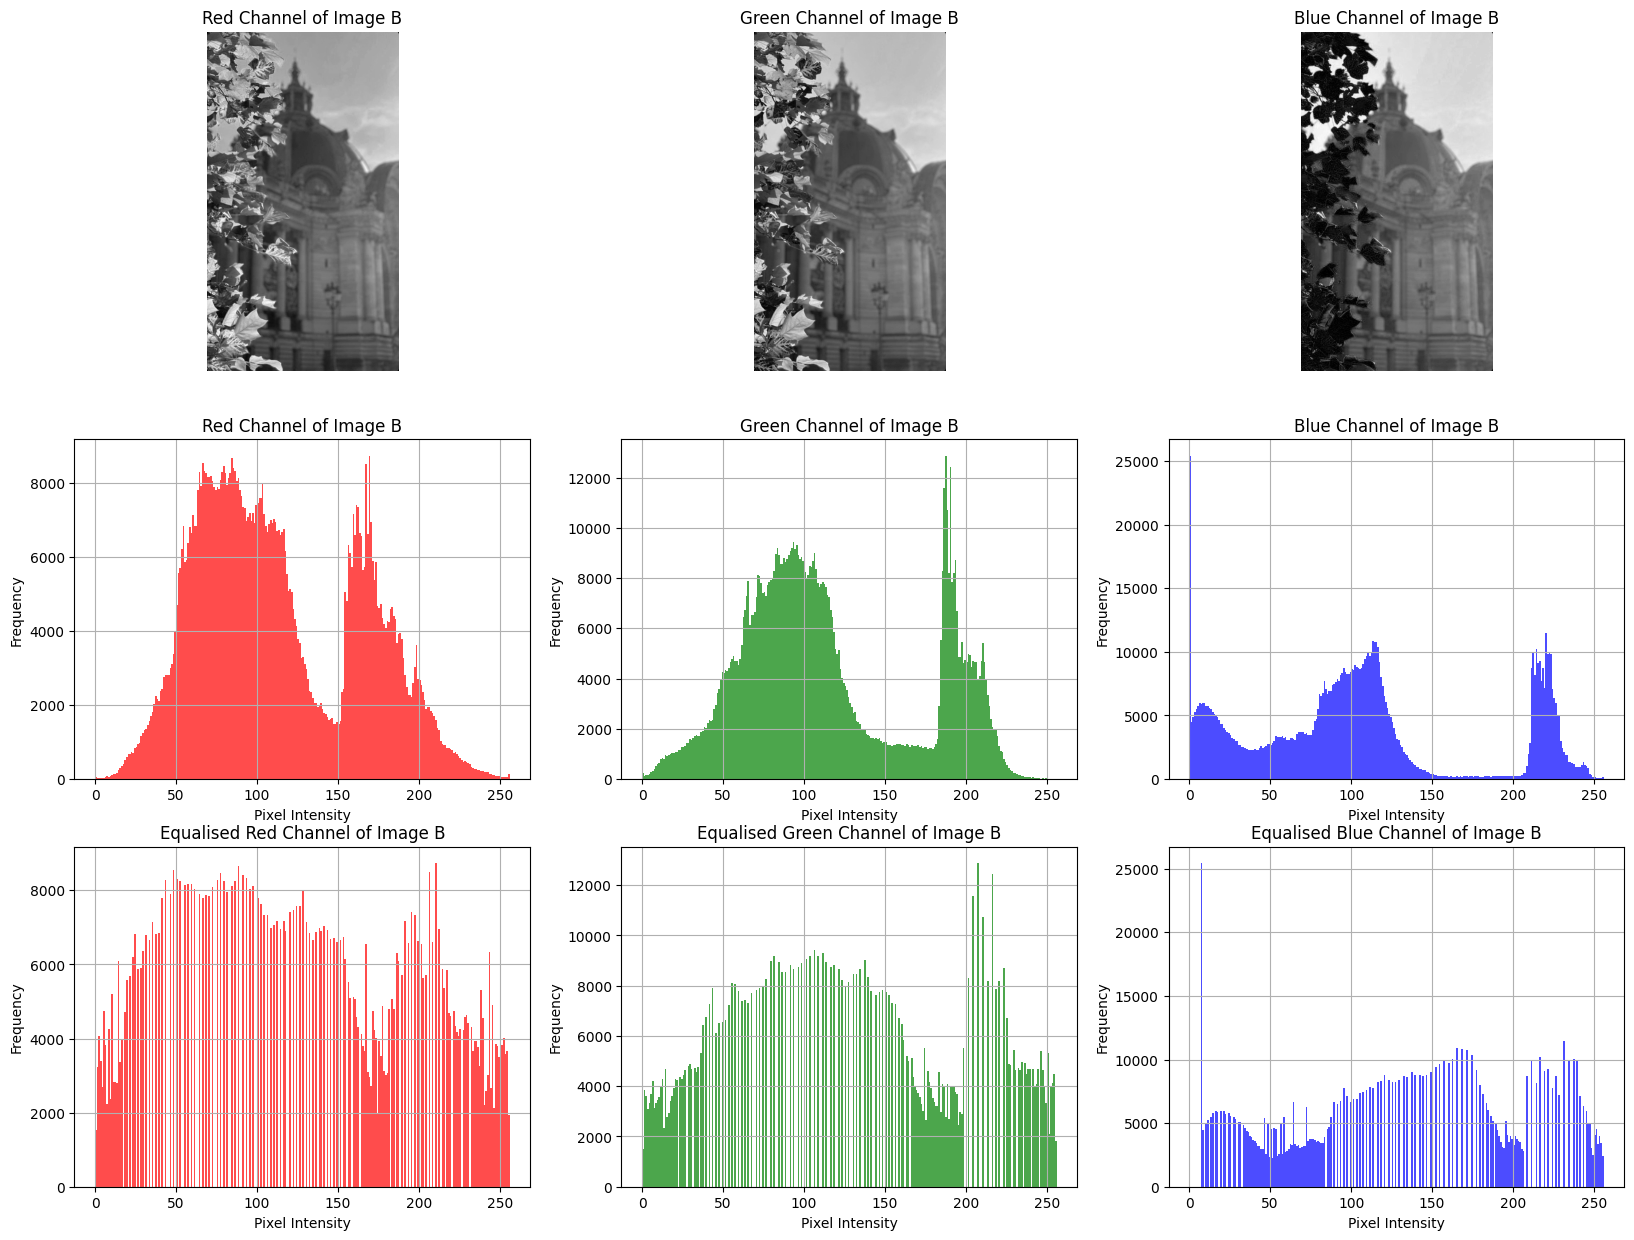

In [9]:
B_red_channel = B_img[:,:,0]
B_green_channel = B_img[:,:,1]
B_blue_channel = B_img[:,:,2]

B_red_equalised = histequalize(B_red_channel)
B_green_equalised = histequalize(B_green_channel)
B_blue_equalised = histequalize(B_blue_channel)

plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
plt.imshow(B_red_channel,cmap='gray')
plt.title("Red Channel of Image B")
plt.axis('off')

plt.subplot(3,3,2)
plt.imshow(B_green_channel,cmap='gray')
plt.title("Green Channel of Image B")
plt.axis('off')

plt.subplot(3,3,3)
plt.imshow(B_blue_channel,cmap='gray')
plt.title("Blue Channel of Image B")
plt.axis('off')

plt.subplot(3,3,4)
plot_histogram(B_red_channel,'red')
plt.title("Red Channel of Image B")

plt.subplot(3,3,5)
plot_histogram(B_green_channel,'green')
plt.title("Green Channel of Image B")

plt.subplot(3,3,6)
plot_histogram(B_blue_channel,'blue')
plt.title("Blue Channel of Image B")

plt.subplot(3,3,7)
plot_histogram(B_red_equalised,'red')
plt.title("Equalised Red Channel of Image B")

plt.subplot(3,3,8)
plot_histogram(B_green_equalised,'green')
plt.title("Equalised Green Channel of Image B")

plt.subplot(3,3,9)
plot_histogram(B_blue_equalised,'blue')
plt.title("Equalised Blue Channel of Image B")

plt.show()

### Subtask 4

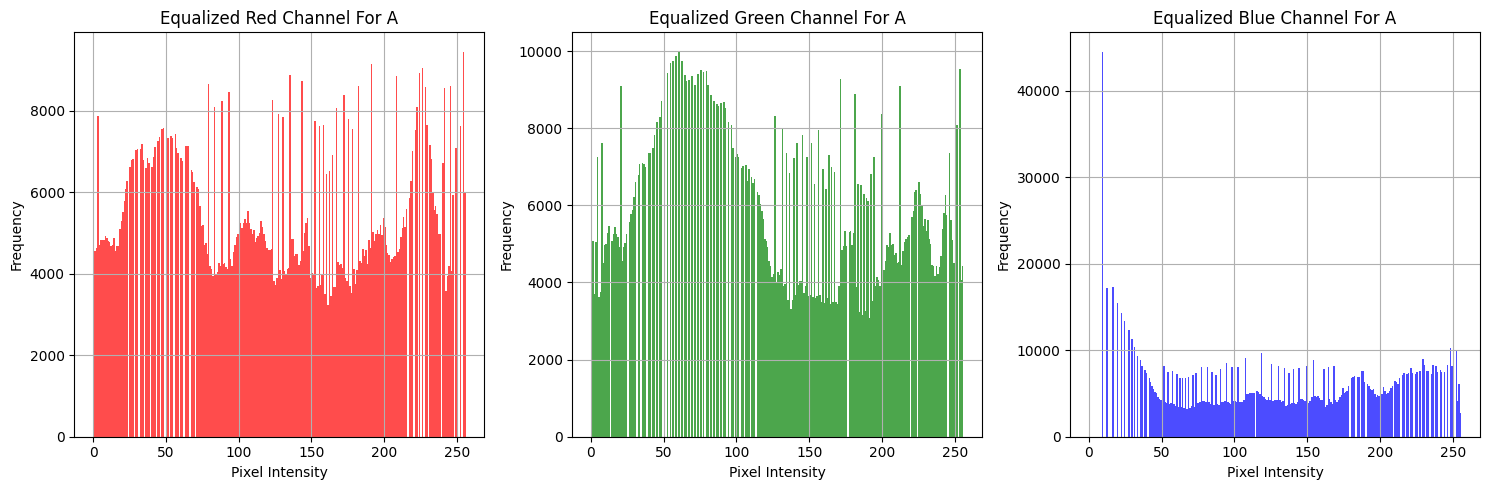

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plot_histogram(A_red_equalised,'red')
plt.title("Equalized Red Channel For A")

plt.subplot(1,3,2)
plot_histogram(A_green_equalised,'green')
plt.title("Equalized Green Channel For A")

plt.subplot(1,3,3)
plot_histogram(A_blue_equalised,'blue')
plt.title("Equalized Blue Channel For A")

plt.tight_layout()
plt.show()

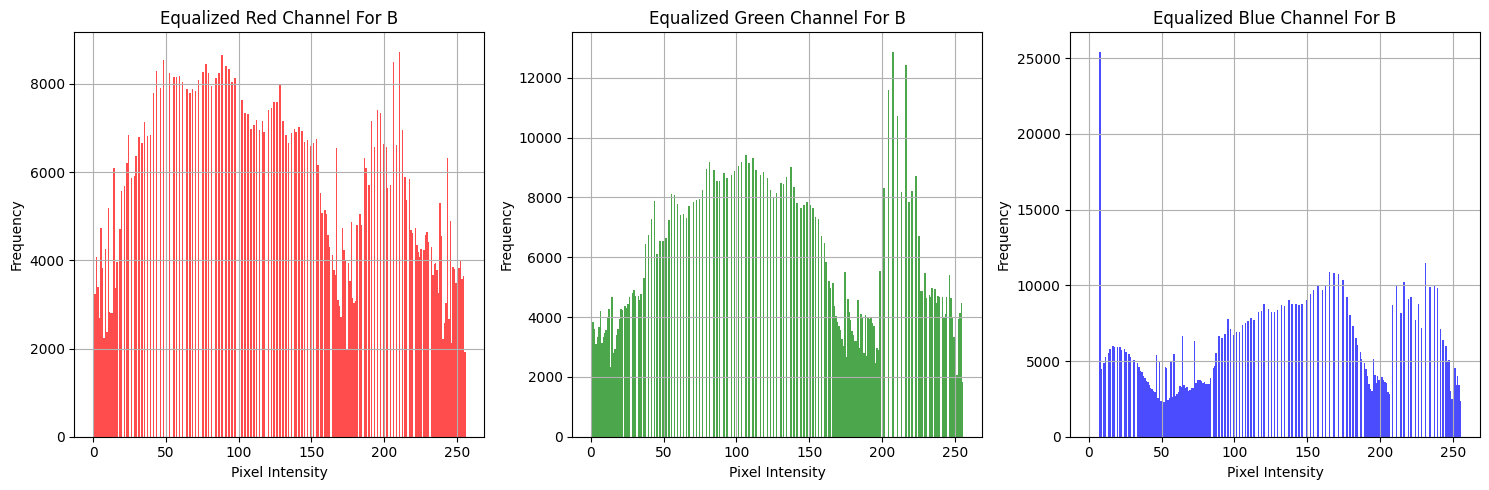

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plot_histogram(B_red_equalised,'red')
plt.title("Equalized Red Channel For B")

plt.subplot(1,3,2)
plot_histogram(B_green_equalised,'green')
plt.title("Equalized Green Channel For B")

plt.subplot(1,3,3)
plot_histogram(B_blue_equalised,'blue')
plt.title("Equalized Blue Channel For B")

plt.tight_layout()
plt.show()

### Subtask 5

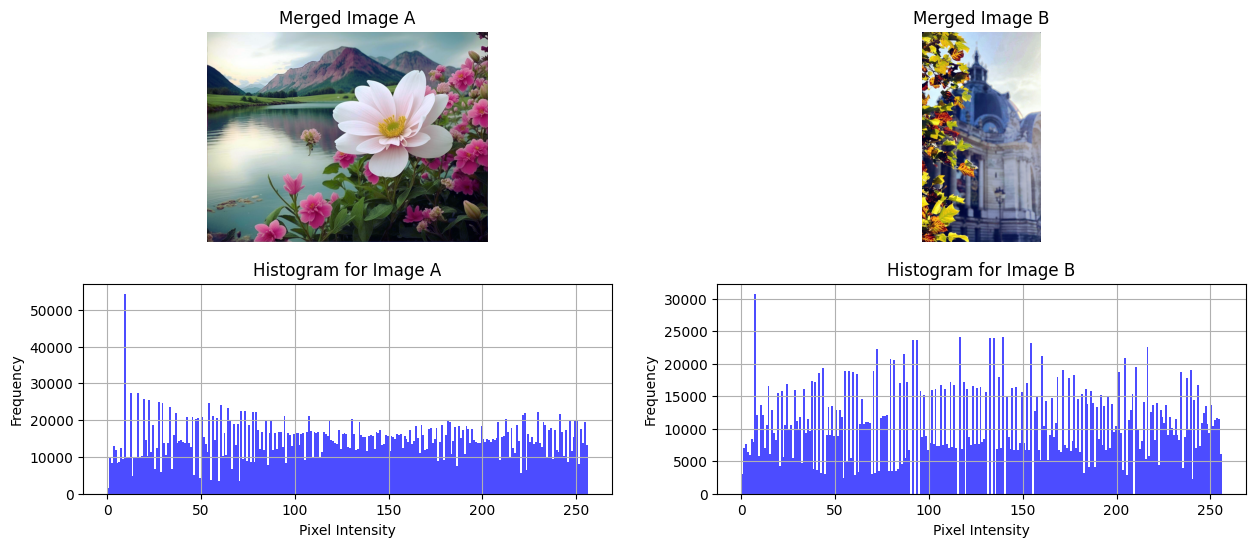

In [12]:
rebuilt_image_A = np.stack([A_red_equalised,A_green_equalised,A_blue_equalised], axis=-1)
rebuilt_image_B = np.stack([B_red_equalised,B_green_equalised,B_blue_equalised], axis=-1)

plt.figure(figsize=(15,6))

plt.subplot(2,2,1)
plt.imshow(rebuilt_image_A)
plt.title("Merged Image A")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(rebuilt_image_B)
plt.title("Merged Image B")
plt.axis('off')

plt.subplot(2,2,3)
plot_histogram(rebuilt_image_A,'blue')
plt.title("Histogram for Image A")

plt.subplot(2,2,4)
plot_histogram(rebuilt_image_B,'blue')
plt.title("Histogram for Image B")

plt.show()

### Subtask 6

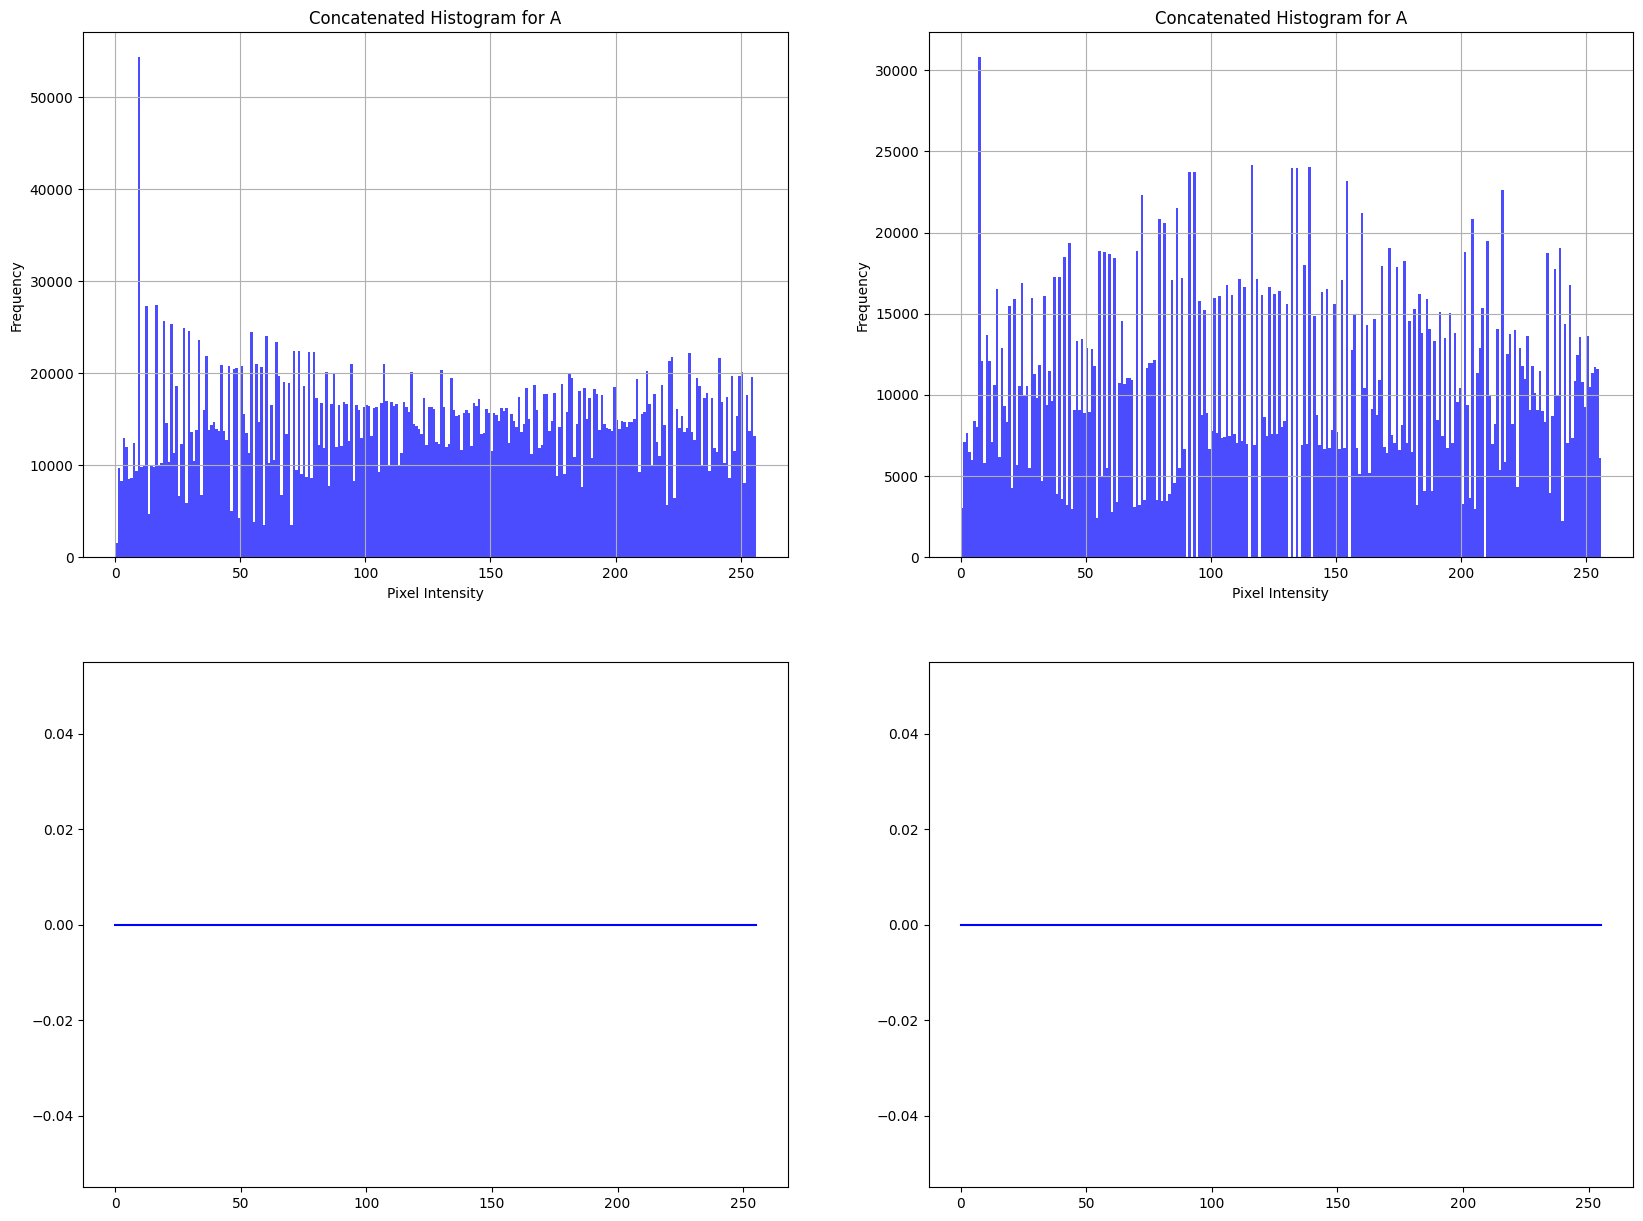

In [13]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
combined_array_1 = result = np.concatenate((A_red_equalised, A_green_equalised, A_blue_equalised))
plot_histogram(combined_array_1, 'blue')
plt.title("Concatenated Histogram for A")  

plt.subplot(2,2,2)
combined_array_2 = result = np.concatenate((B_red_equalised, B_green_equalised, B_blue_equalised))
plot_histogram(combined_array_2, 'blue')
plt.title("Concatenated Histogram for A")   

plt.subplot(2,2,3)
histogram_A, bins = np.histogram(combined_array_1, bins=256, range=[0,256])
histogram_B, bins = np.histogram(rebuilt_image_A.flatten(), bins=256, range=[0,256])
difference_array_1 = np.abs(histogram_A-histogram_B)
indices = np.arange(256)
plt.plot(indices, difference_array_1, linestyle='-', color='b', label='Value')

plt.subplot(2,2,4)
histogram_A, bins = np.histogram(combined_array_2, bins=256, range=[0,256])
histogram_B, bins = np.histogram(rebuilt_image_B.flatten(), bins=256, range=[0,256])
difference_array_2 = np.abs(histogram_A-histogram_B)
indices = np.arange(256)
plt.plot(indices, difference_array_2, linestyle='-', color='b', label='Value')

plt.show()

### Subtask 7

Equalising a histogram involves computing pixel distribution (pdf), calculating cdf, normalizing the cdf, scaling it to 255 and then using this transformation on original pixels. For this question, histogram for color images was plotted by flattening them. First separating RGB channels, flattening them individually, merging them and plotting the pooled histogram gives same results as concatenating the individual histograms.

# Question 3: Who's The Best

### Subtask 1

In [14]:
def extract_lsb(image):    
    lsb_plane = np.zeros_like(image)
    lsb_plane = image & 1    
    lsb_image = lsb_plane * 255
    return lsb_image

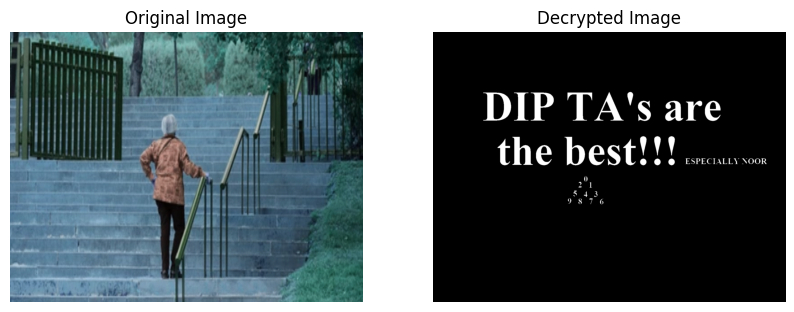

In [47]:
image_path = "../src_img/9_mod.png"
X_mod_image = cv2.imread(image_path)

lsb = extract_lsb(X_mod_image)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(X_mod_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(lsb)
plt.title("Decrypted Image")
plt.axis('off')

plt.show()

### Subtask 2

DIP TA's are the best!!! Especially Noor.

### Subtask 3

For encrypting messages images in base images, we need to resize the images for them to match dimensions. It might be possible that in this process, the message image becomes wierdly proportioned.

### Subtask 4

The cryptic image was created by encrypting the message image in the LSB of base image. We know that the LSB holds the least information about the image i.e only 1 quant of information. Thus replacing the LSB of the original image with our encrypted data does not greatly hamper the base image quality. For encrypting, the message image is quantised to 1 bit and this bit is written onto the LSB of base image. Thus extracting this LSB, gives us our original image back but in a compressed form.

### Subtask 5

In [16]:
def manual_resize(img,new_width,new_height):
    orig_height, orig_width = img.shape[:2]
    resized_img = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    # Calculate the ratio of the old dimensions to the new dimensions
    row_ratio = orig_height / new_height
    col_ratio = orig_width / new_width

    # Iterate over the pixels of the resized image
    for i in range(new_height):
        for j in range(new_width):
            orig_i = int(i * row_ratio)
            orig_j = int(j * col_ratio)

            resized_img[i,j] = img[orig_i,orig_j]
    return resized_img

In [17]:
def crypt(base_image,message_image):
    resized_message_image = np.copy(message_image)

    if base_image.shape[:2] != message_image.shape[:2]:
        resized_message_image = manual_resize(message_image,base_image.shape[1],base_image.shape[0])    

    # Clear the last bit to 0 by anding with 11111110. Then right shift message image to make its MSB 
    # as LSB and then ORing it would place MSB of message into LSB of base.
    embedded_image = (base_image & 0xFE) | (resized_message_image >> 7)
    return embedded_image


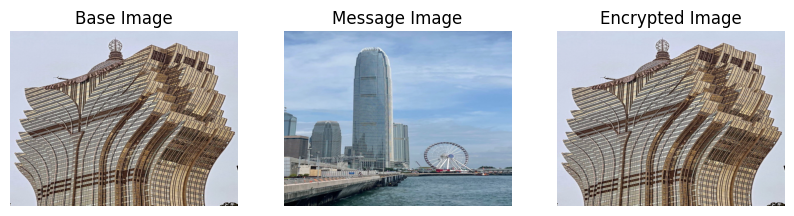

In [18]:
base_image_path = "../src_img/2_mod.png"
message_image_path = "../src_img/3_mod.png"

base_image = cv2.imread(base_image_path)
base_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)

message_image = cv2.imread(message_image_path)
message_image = cv2.cvtColor(message_image, cv2.COLOR_BGR2RGB)

embedded_image = crypt(base_image,message_image)
cv2.imwrite(f"../out_img/embedded_image.png",cv2.cvtColor(embedded_image,cv2.COLOR_RGB2BGR))

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(base_image)
plt.title("Base Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(message_image)
plt.title("Message Image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(embedded_image)
plt.title("Encrypted Image")
plt.axis('off')

plt.show()

### Reverse message and base

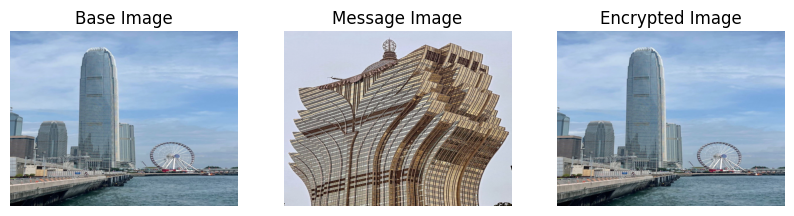

In [19]:
message_image_path = "../src_img/2_mod.png"
base_image_path = "../src_img/3_mod.png"

base_image = cv2.imread(base_image_path)
base_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)

message_image = cv2.imread(message_image_path)
message_image = cv2.cvtColor(message_image, cv2.COLOR_BGR2RGB)

embedded_image_2 = crypt(base_image,message_image)
cv2.imwrite(f"../out_img/embedded_image_2.png",cv2.cvtColor(embedded_image_2,cv2.COLOR_RGB2BGR))


plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(base_image)
plt.title("Base Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(message_image)
plt.title("Message Image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(embedded_image_2)
plt.title("Encrypted Image")
plt.axis('off')

plt.show()

### Subtask 6

In [20]:
def decrypt(embedded_image):
    # Extract the LSBs from the embedded image by masking all bits except the LSB
    extracted_bits = embedded_image & 0x01
    
    # Shift the extracted bits to the left to reconstruct the original image
    recovered_message_image = extracted_bits << 7
    
    return recovered_message_image

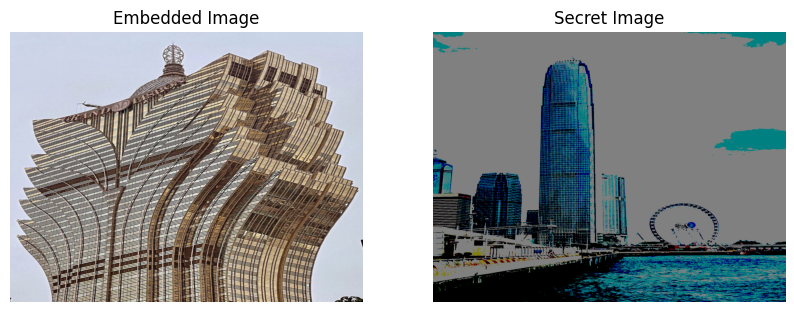

In [21]:
extracted_image = decrypt(embedded_image)
cv2.imwrite(f"../out_img/decrypted_image.png",cv2.cvtColor(extracted_image,cv2.COLOR_RGB2BGR))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(embedded_image)
plt.title("Embedded Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(extracted_image)
plt.title("Secret Image")
plt.axis('off')

plt.show()

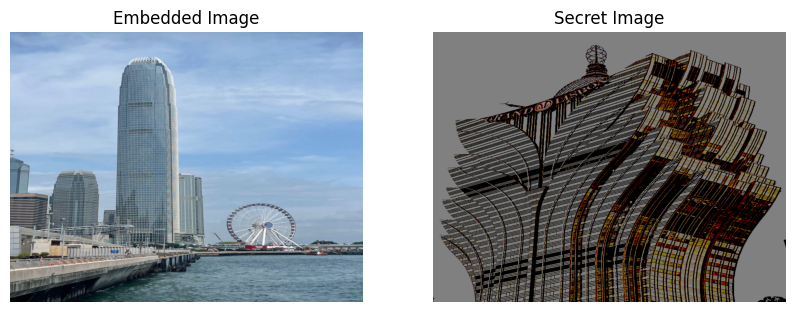

In [22]:
extracted_image_2 = decrypt(embedded_image_2)
cv2.imwrite(f"../out_img/decrypted_image_2.png",cv2.cvtColor(extracted_image_2,cv2.COLOR_RGB2BGR))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(embedded_image_2)
plt.title("Embedded Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(extracted_image_2)
plt.title("Secret Image")
plt.axis('off')

plt.show()

# Question 4: It just doesn’t end, does it

### Subtask 1

In [23]:
def red_transformation(image,a):
    if len(image.shape) == 3:
        red_channel = image[:,:,0]
    else:
        red_channel = image
    red_channel_transformed = np.empty_like(red_channel)
    red_channel_transformed = red_channel_transformed.astype(np.uint16)

    mask1 = (red_channel >= 0) & (red_channel <= 100)
    mask2 = (red_channel > 100) & (red_channel <= 200)
    mask3 = (red_channel > 200) & (red_channel <= 255)

    red_channel_transformed[mask1] = red_channel[mask1] + a
    red_channel_transformed[mask2] = (red_channel[mask2] // a) + (2 * a)
    red_channel_transformed[mask3] = 255

    red_channel_transformed = np.clip(red_channel_transformed,0,255).astype(np.uint8)

    return red_channel_transformed


In [62]:
def green_transformation(image,a):
    if len(image.shape) == 3:
        green_channel = image[:,:,1]
    else:
        green_channel = image
        
    green_channel_transformed = np.empty_like(green_channel)
    green_channel_transformed = green_channel_transformed.astype(np.int32)

    mask1 = (green_channel >= 0) & (green_channel <= 128)
    mask2 = (green_channel > 128) & (green_channel <= 255)

    green_channel_transformed[mask1] = np.where((5 * green_channel[mask1] + 1) > 255, 
                                            255, 
                                            5 * green_channel[mask1] + 1)

    green_channel_transformed[mask2] = (a//green_channel[mask2]) + 8

    green_channel_transformed = np.clip(green_channel_transformed,0,255).astype(np.uint8)

    return green_channel_transformed


In [54]:
def blue_transformation(image,a):
    if len(image.shape) == 3:
        blue_channel = image[:,:,2]
    else:
        blue_channel = image
        
    blue_channel_transformed = np.empty_like(blue_channel)
    blue_channel_transformed = blue_channel_transformed.astype(np.uint16)

    mask1 = (blue_channel >= 0) & (blue_channel <= 75)
    mask2 = (blue_channel > 75) & (blue_channel <= 200)
    mask3 = (blue_channel > 200) & (blue_channel <= 255)

    blue_channel_transformed[mask1] = 255
    blue_channel_transformed[mask2] = blue_channel[mask2]
    blue_channel_transformed[mask3] = 0

    blue_channel_transformed = np.clip(blue_channel_transformed,0,255).astype(np.uint8)

    return blue_channel_transformed

In [55]:
def transform_image(image,a):
    red_transformed = red_transformation(image,a)
    green_transformed = green_transformation(image,a)
    blue_transformed = blue_transformation(image,a)

    transformed_image = np.stack((red_transformed,green_transformed,blue_transformed),axis=-1)
    return transformed_image


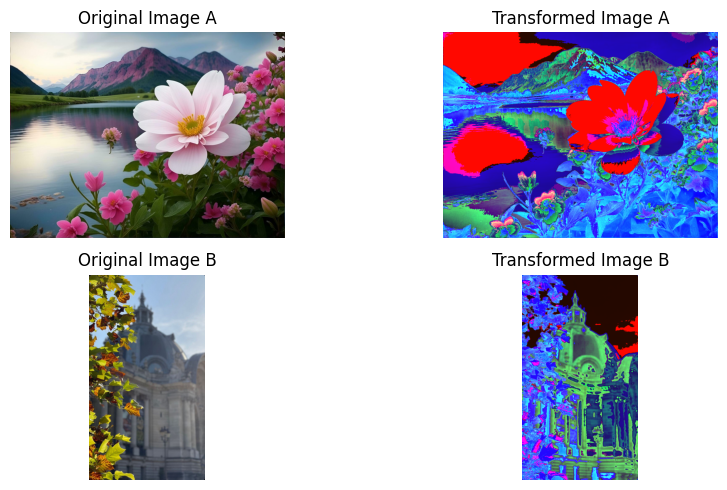

In [56]:
a = 9
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.imshow(A_img)
plt.title("Original Image A")
plt.axis('off')

plt.subplot(2,2,2)
image_A_after_transformation = transform_image(A_img,a)
cv2.imwrite(f"../out_img/transformed_image_A.png",cv2.cvtColor(image_A_after_transformation,cv2.COLOR_RGB2BGR))
plt.imshow(image_A_after_transformation)
plt.title("Transformed Image A")
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(B_img)
plt.title("Original Image B")
plt.axis('off')

plt.subplot(2,2,4)
image_B_after_transformation = transform_image(B_img,a)
cv2.imwrite(f"../out_img/transformed_image_B.png",cv2.cvtColor(image_B_after_transformation,cv2.COLOR_RGB2BGR))
plt.imshow(image_B_after_transformation)
plt.title("Transformed Image B")
plt.axis('off')

plt.tight_layout()
plt.show()

### Subtask 2

In [57]:
def extract_transformation(original_channel,transformed_channel):
    original_channel = original_channel.flatten()
    transformed_channel = transformed_channel.flatten()
    # Find unique pixel intensities
    unique_originals, indices = np.unique(original_channel, return_index=True)
    unique_transformed = transformed_channel[indices]
    return (unique_originals,unique_transformed)
    

In [58]:
def compute_line_of_best_fit(transformation_values):
    x = np.array(transformation_values[0])
    y = np.array(transformation_values[1])

    # Account for bias term
    X = np.vstack([x, np.ones(len(x))]).T
    
    # Solve for the slope and intercept
    coefficients, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
    slope, intercept = coefficients

    return slope, intercept

Red Slope: 0.7966093967114406
Red Intercept: -10.357628676470577
Green Slope: -0.9271226551644277
Green Intercept: 224.8975183823528
Blue Slope: -1.00018092867068
Blue Intercept: 270.6700367647057


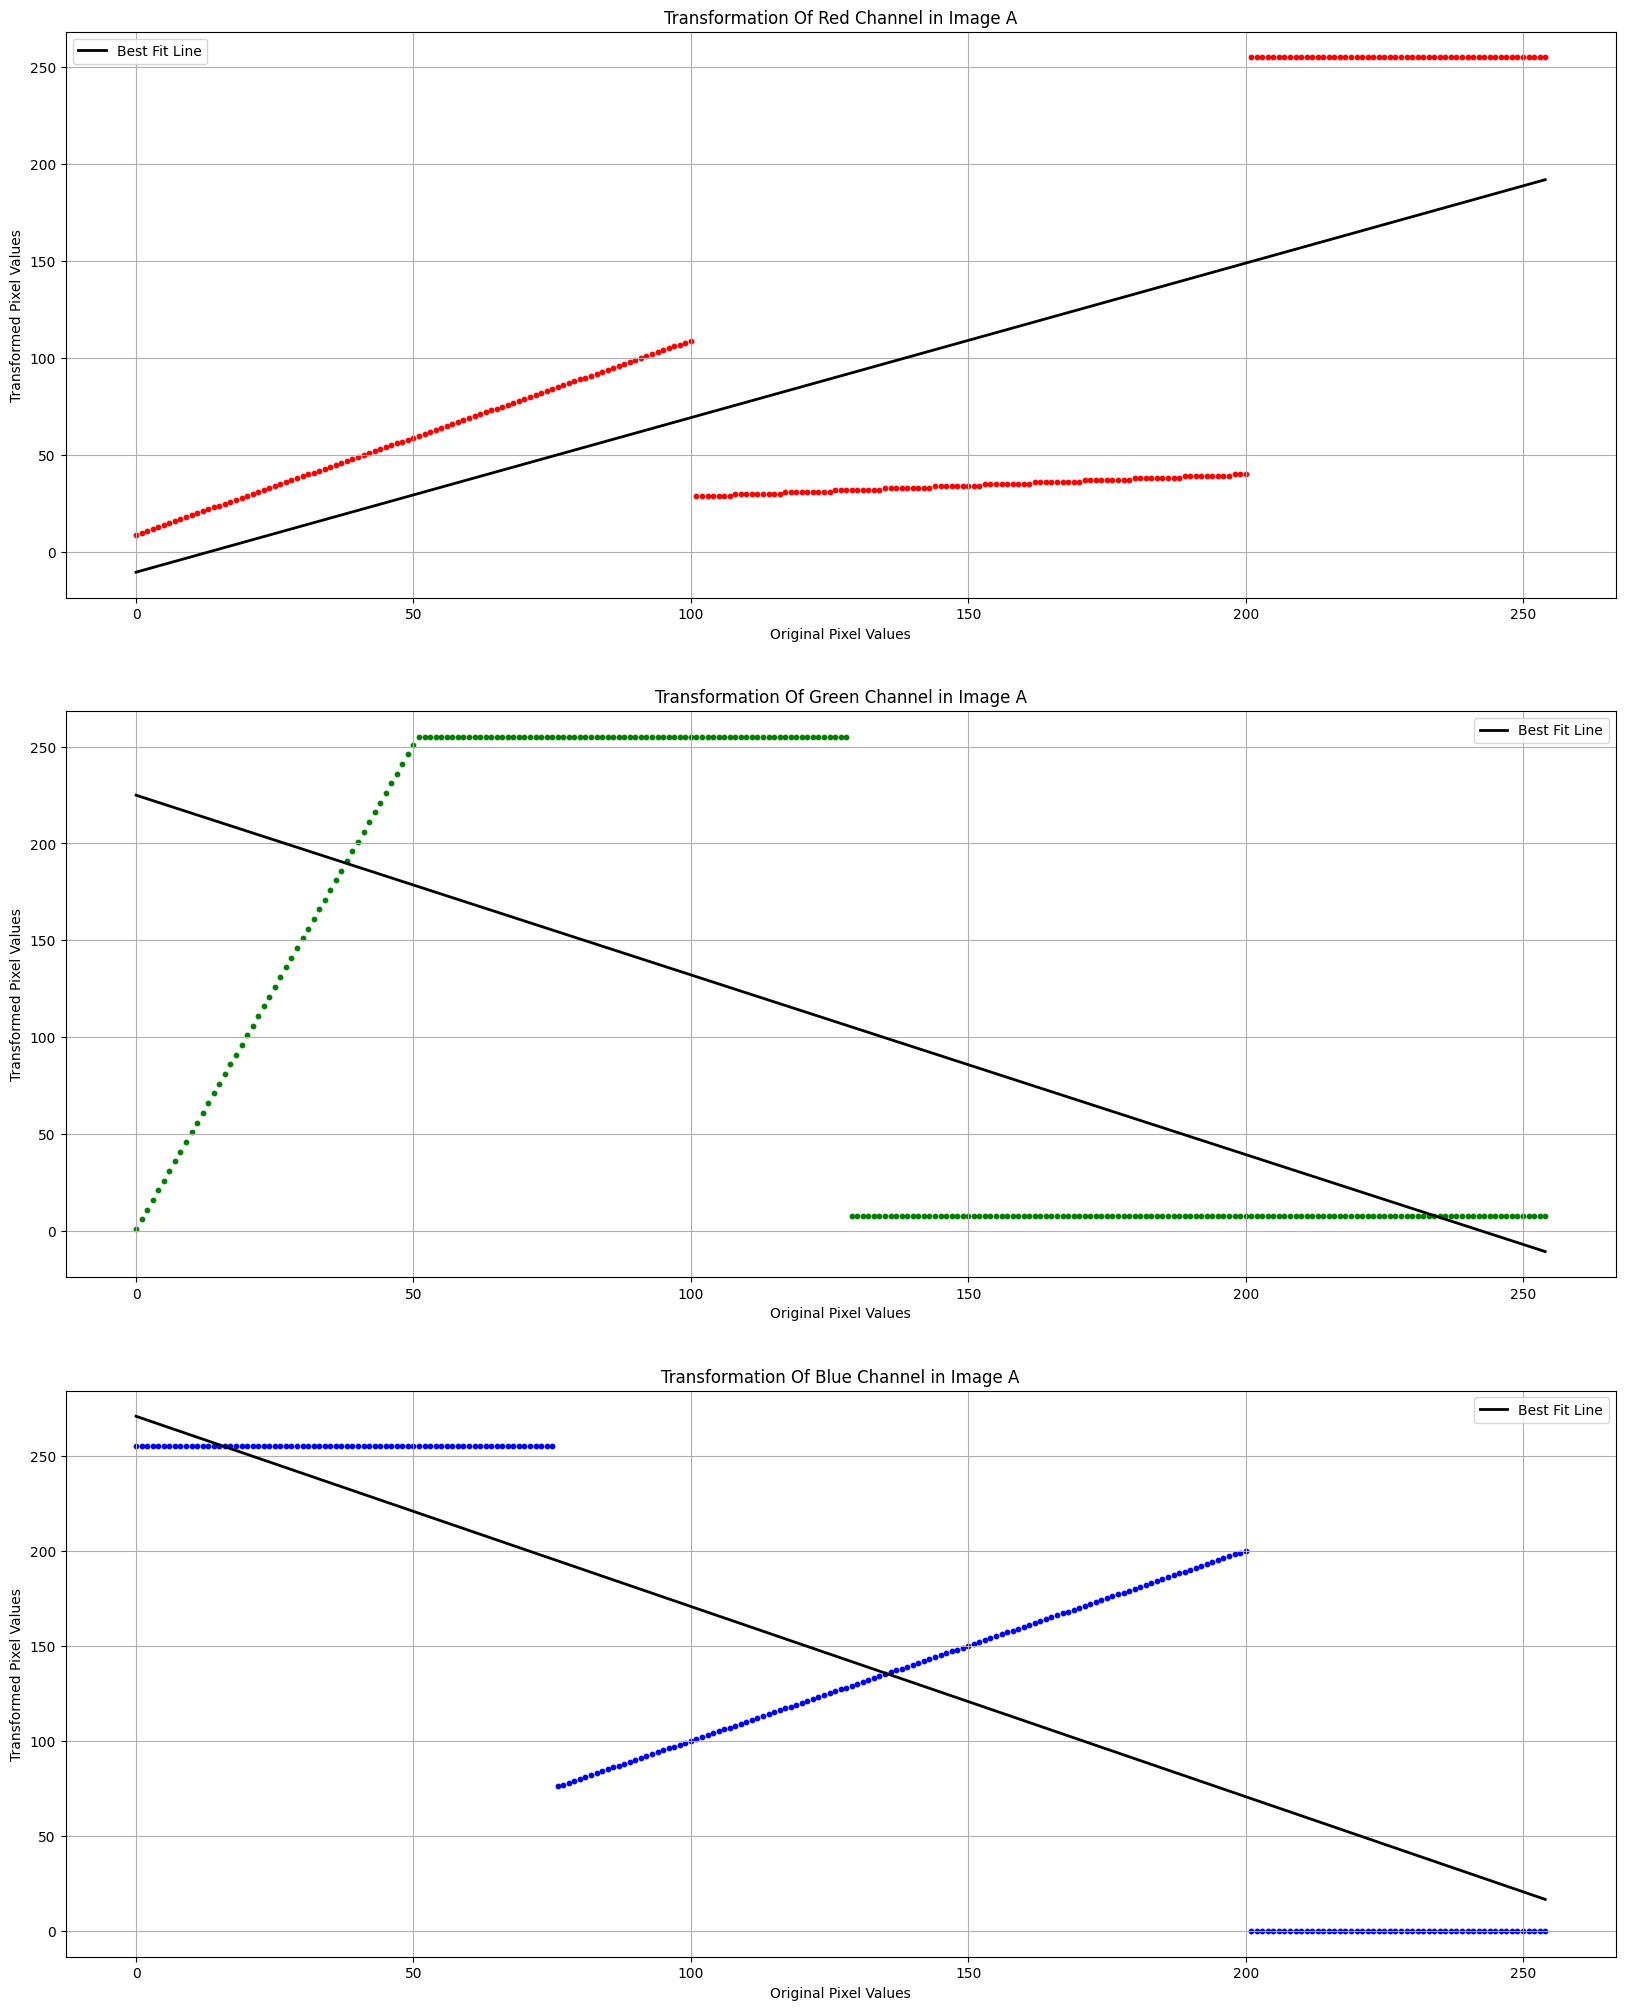

In [59]:
a = 9

A = np.arange(0,255)

trans_A_red_channel = red_transformation(A, a)
trans_A_green_channel = green_transformation(A, a)
trans_A_blue_channel = blue_transformation(A, a)

red_trans_A = extract_transformation(A,trans_A_red_channel)
green_trans_A = extract_transformation(A,trans_A_green_channel)
blue_trans_A = extract_transformation(A,trans_A_blue_channel)

plt.figure(figsize=(20, 25))

plt.subplot(3,1,1)
plt.scatter(red_trans_A[0], red_trans_A[1], color='red', marker='o',s=10)
slope,intercept = compute_line_of_best_fit(red_trans_A)
print("Red Slope:",slope)
print("Red Intercept:",intercept)
line_x = np.linspace(min(red_trans_A[0]), max(red_trans_A[0]), 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')
plt.title("Transformation Of Red Channel in Image A")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.legend()
plt.grid(True)

plt.subplot(3,1,2)
plt.scatter(green_trans_A[0], green_trans_A[1], color='green', marker='o',s=10)
slope,intercept = compute_line_of_best_fit(green_trans_A)
print("Green Slope:",slope)
print("Green Intercept:",intercept)
line_x = np.linspace(min(green_trans_A[0]), max(green_trans_A[0]), 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')
plt.title("Transformation Of Green Channel in Image A")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.legend()
plt.grid(True)

plt.subplot(3,1,3)
plt.scatter(blue_trans_A[0], blue_trans_A[1], color='blue', marker='o',s=10)
slope,intercept = compute_line_of_best_fit(blue_trans_A)
print("Blue Slope:",slope)
print("Blue Intercept:",intercept)
line_x = np.linspace(min(blue_trans_A[0]), max(blue_trans_A[0]), 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')
plt.title("Transformation Of Blue Channel in Image A")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.legend()
plt.grid(True)

plt.show()

Red Slope: 0.7966093967114406
Red Intercept: -10.357628676470577
Green Slope: -0.9271226551644277
Green Intercept: 224.8975183823528
Blue Slope: -1.00018092867068
Blue Intercept: 270.6700367647057


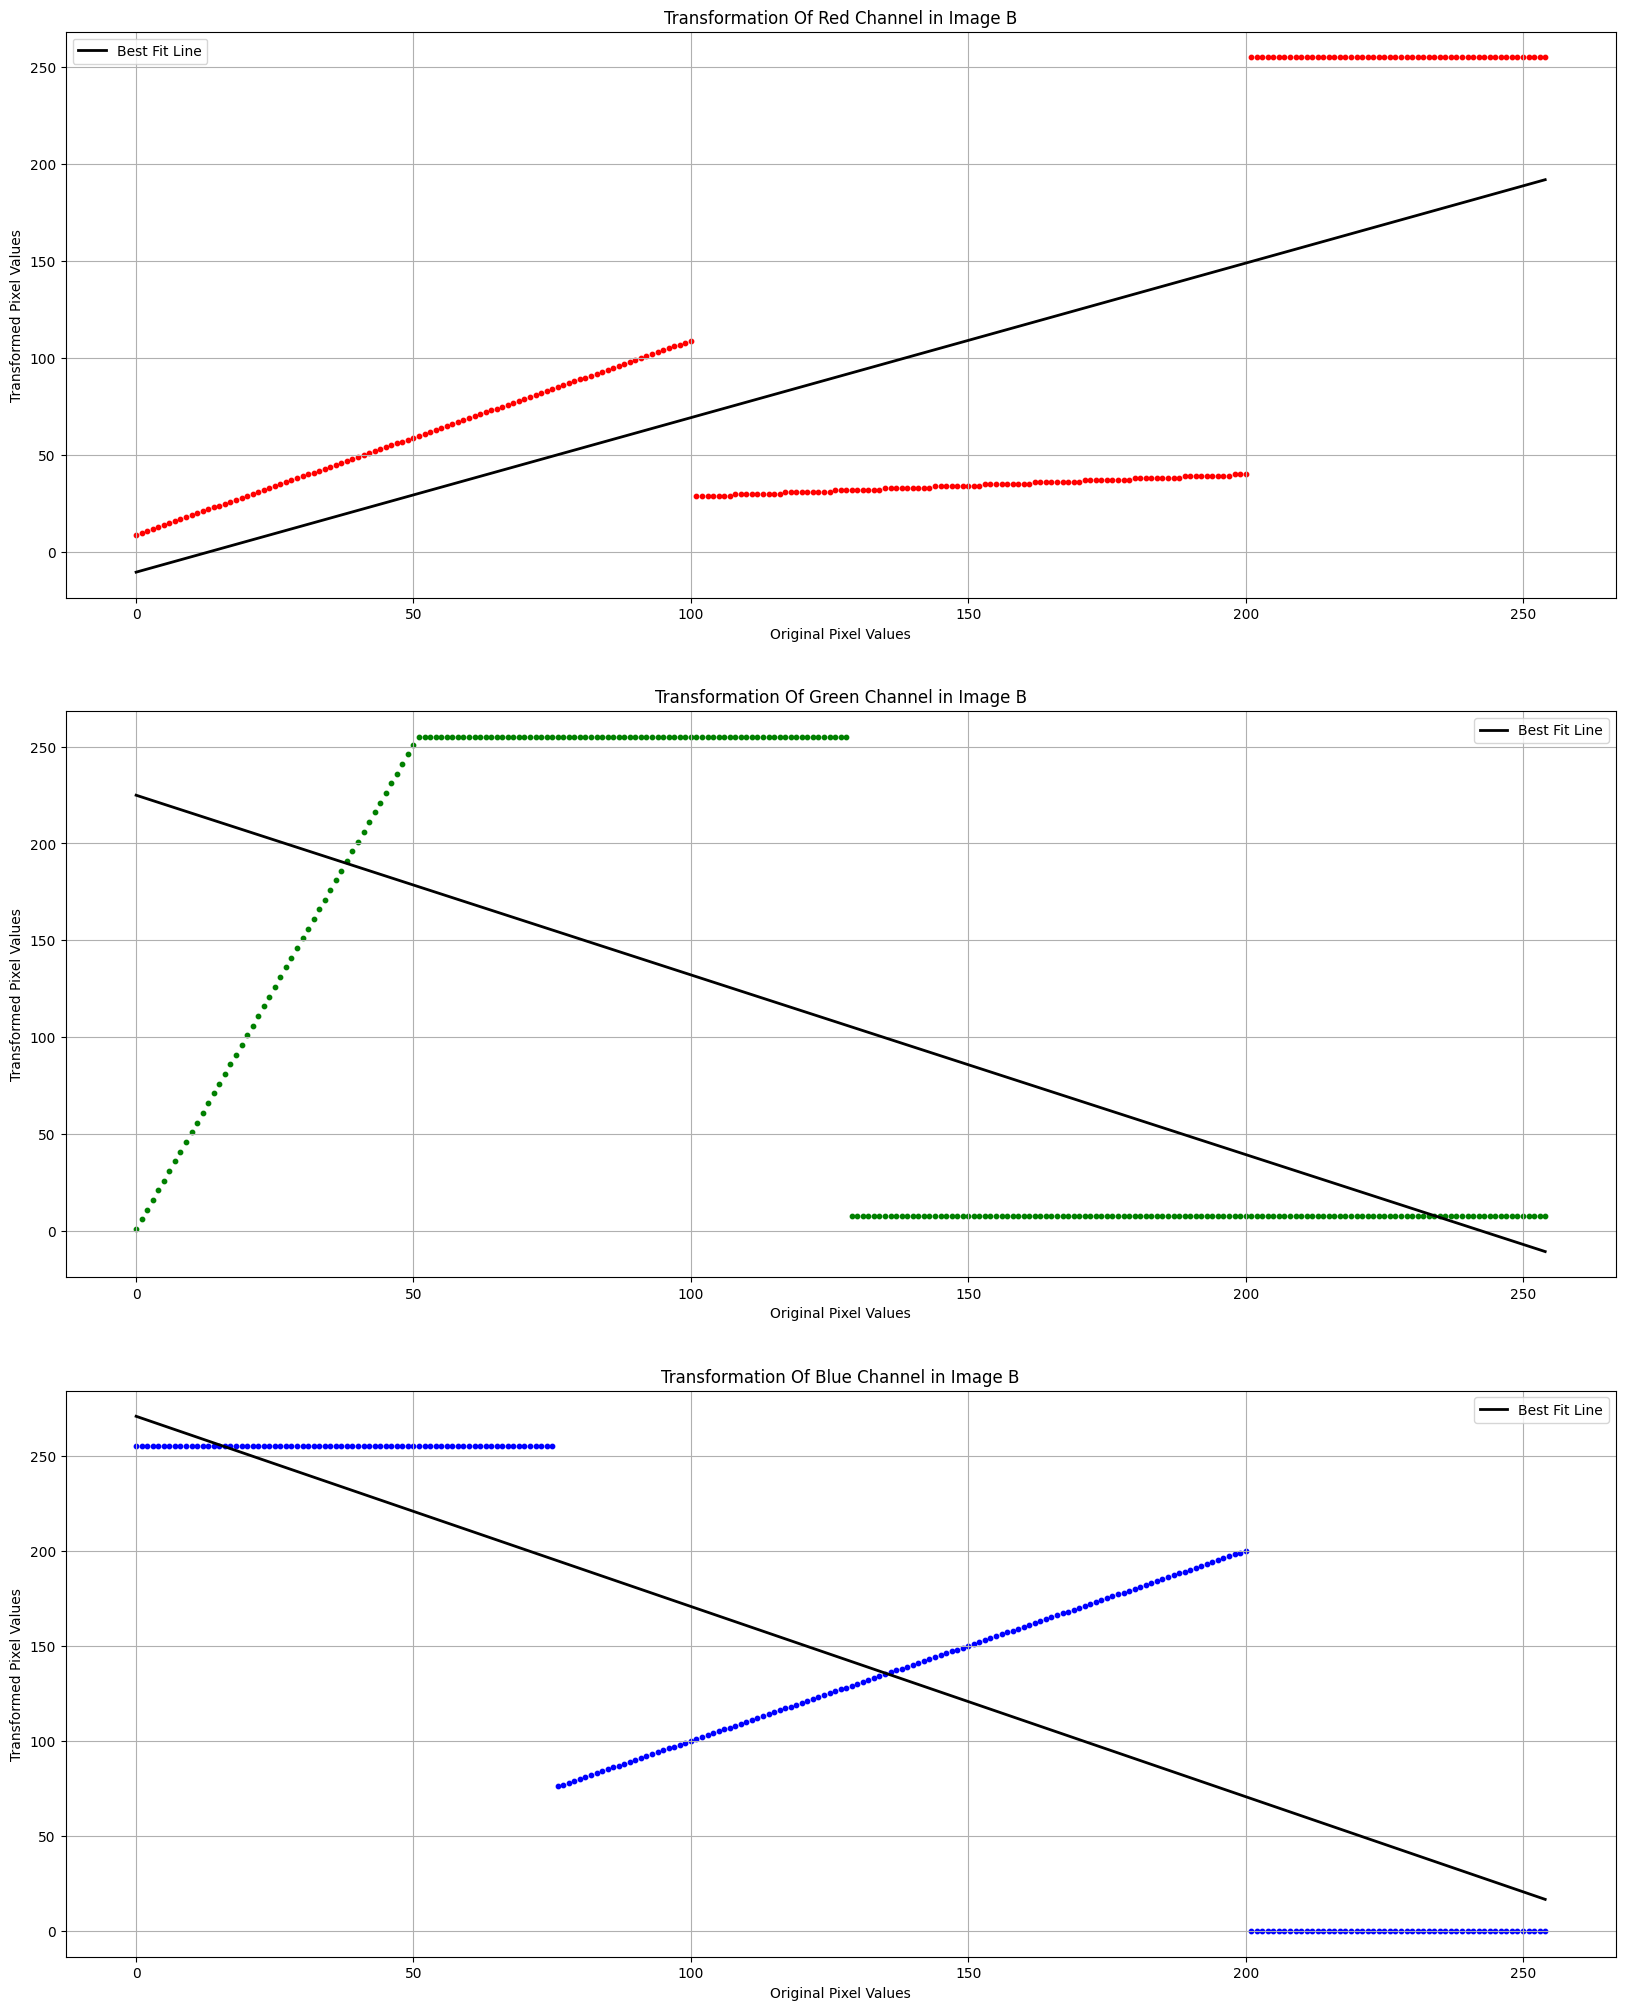

In [60]:
a = 9

A = np.arange(0,255)

trans_B_red_channel = red_transformation(A, a)
trans_B_green_channel = green_transformation(A, a)
trans_B_blue_channel = blue_transformation(A, a)

red_trans_B = extract_transformation(A,trans_B_red_channel)
green_trans_B = extract_transformation(A,trans_B_green_channel)
blue_trans_B = extract_transformation(A,trans_B_blue_channel)

plt.figure(figsize=(20, 25))

plt.subplot(3,1,1)
plt.scatter(red_trans_B[0], red_trans_B[1], color='red', marker='o',s=10)
slope,intercept = compute_line_of_best_fit(red_trans_B)
print("Red Slope:",slope)
print("Red Intercept:",intercept)
line_x = np.linspace(min(red_trans_B[0]), max(red_trans_B[0]), 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')
plt.title("Transformation Of Red Channel in Image B")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.grid(True)
plt.legend()

plt.subplot(3,1,2)
plt.scatter(green_trans_B[0], green_trans_B[1], color='green', marker='o',s=10)
slope,intercept = compute_line_of_best_fit(green_trans_B)
print("Green Slope:",slope)
print("Green Intercept:",intercept)
line_x = np.linspace(min(green_trans_B[0]), max(green_trans_B[0]), 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')
plt.title("Transformation Of Green Channel in Image B")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.grid(True)
plt.legend()


plt.subplot(3,1,3)
plt.scatter(blue_trans_B[0], blue_trans_B[1], color='blue', marker='o',s=10)
slope,intercept = compute_line_of_best_fit(blue_trans_B)
print("Blue Slope:",slope)
print("Blue Intercept:",intercept)
line_x = np.linspace(min(blue_trans_B[0]), max(blue_trans_B[0]), 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')
plt.title("Transformation Of Blue Channel in Image B")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.grid(True)
plt.legend()


plt.show()

### Subtask 3

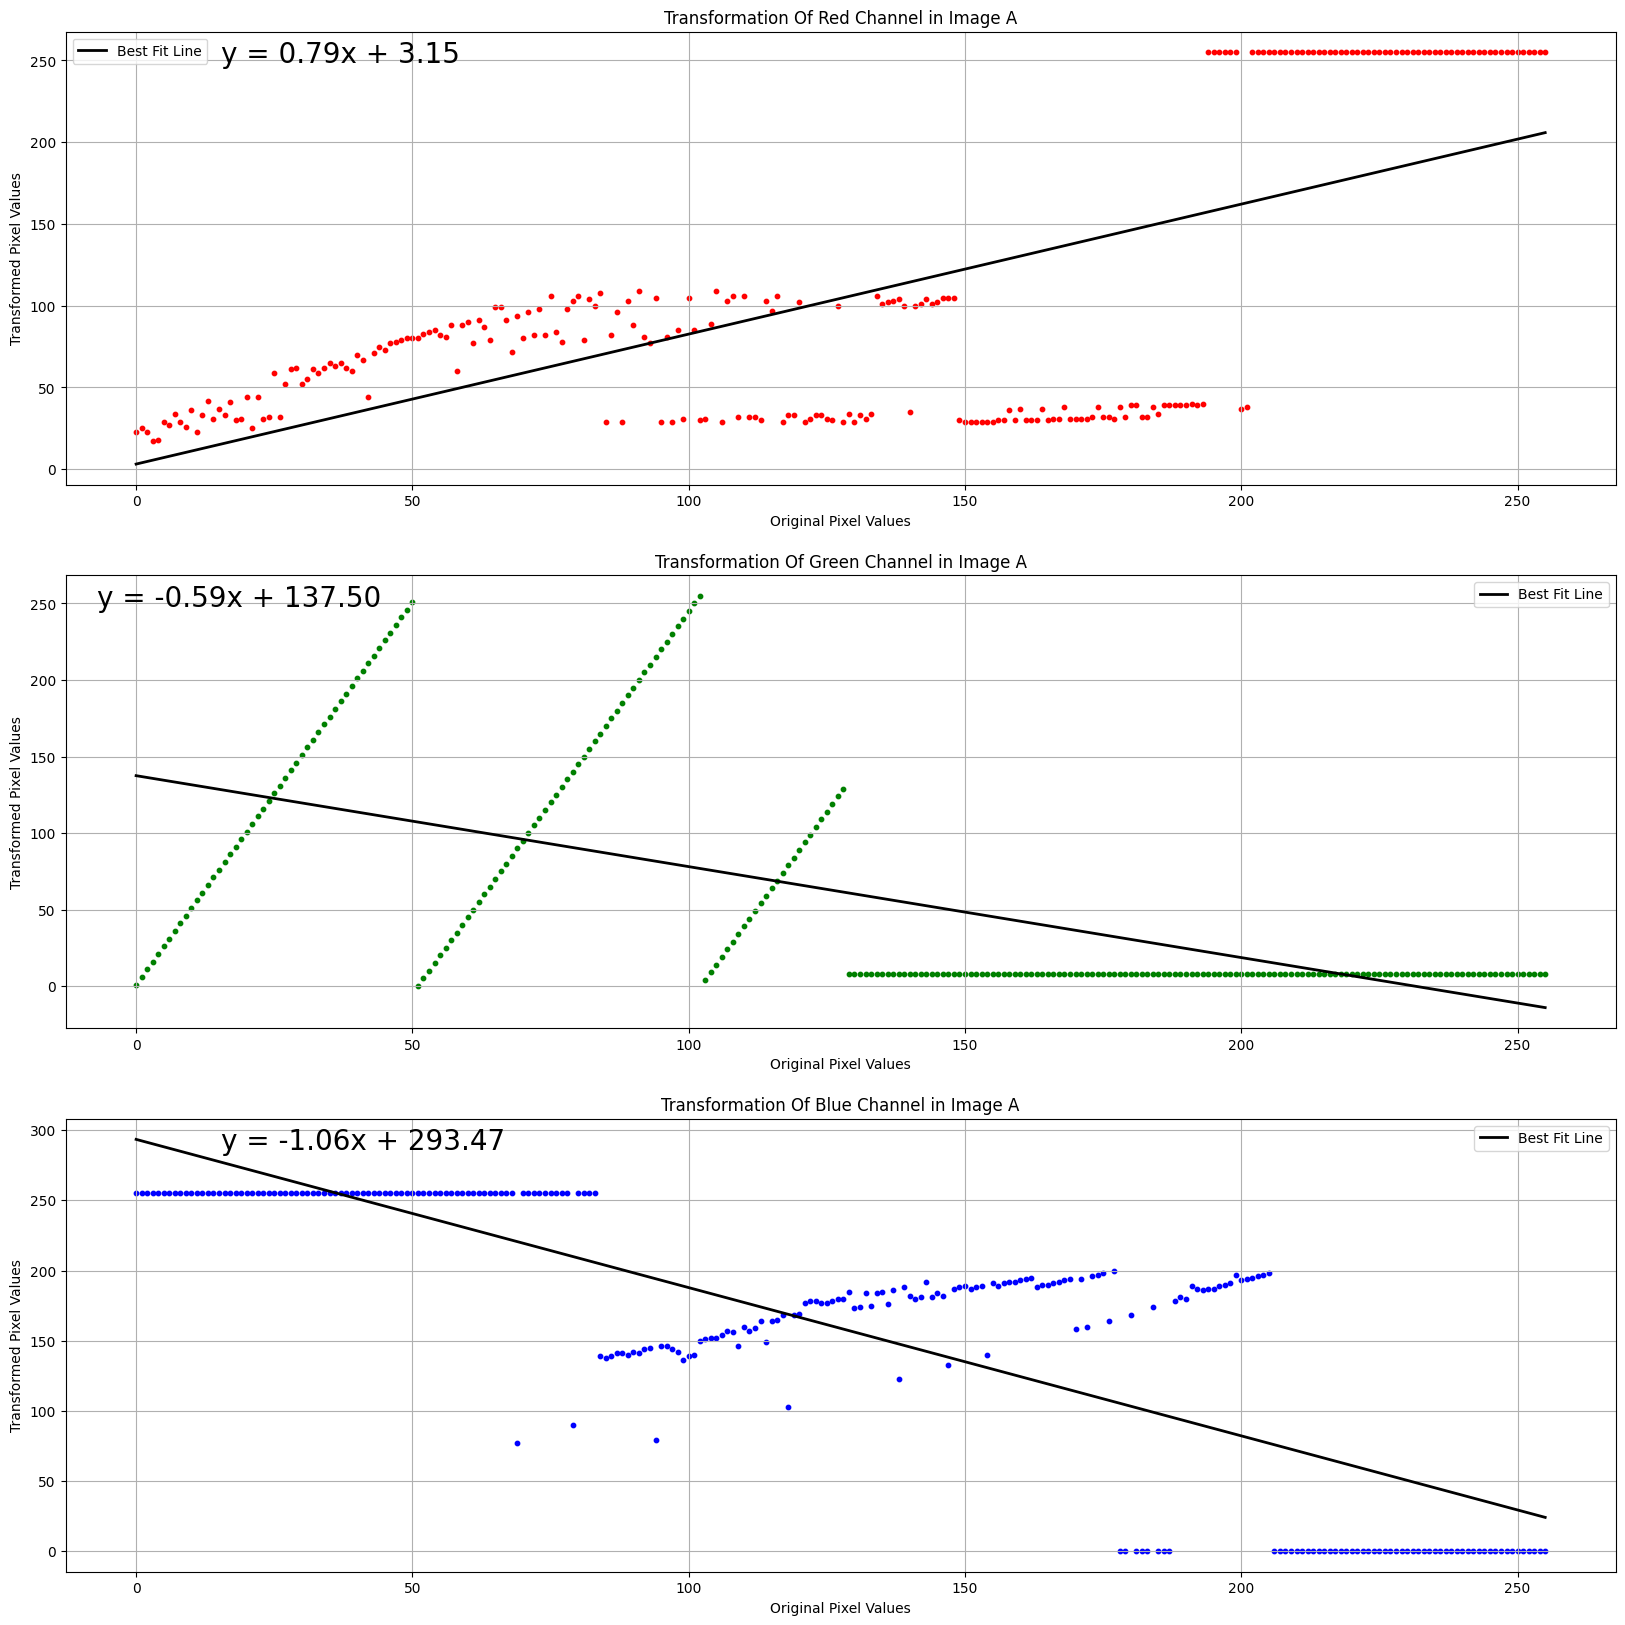

In [63]:
# Read A and transformed A
image_A = cv2.imread(A_path)
image_A = cv2.cvtColor(A_img, cv2.COLOR_BGR2RGB)

transformed_A = cv2.imread("../out_img/transformed_image_A.png")
transformed_A = cv2.cvtColor(transformed_A, cv2.COLOR_BGR2RGB)

# Plot input vs output pixel intensities for 3 separate channels with line of best fit
image_A_r = image_A[:,:,0]
image_A_g = image_A[:,:,1]
image_A_b = image_A[:,:,2]

transformed_A_r = transformed_A[:,:,0]
transformed_A_g = transformed_A[:,:,1]
transformed_A_b = transformed_A[:,:,2]

transformation_A_r = extract_transformation(image_A_r,transformed_A_r)
transformation_A_g = extract_transformation(image_A_g,transformed_A_g)
transformation_A_b = extract_transformation(image_A_b,transformed_A_b)

line_of_best_fits = [compute_line_of_best_fit(x) for x in [transformation_A_r,transformation_A_g,transformation_A_b]]

plt.figure(figsize=(20,20))

plt.subplot(3,1,1)
plt.scatter(transformation_A_r[0], transformation_A_r[1], color='red', marker='o',s=10)
line_x = np.linspace(min(transformation_A_r[0]), max(transformation_A_r[0]), 100)
slope = line_of_best_fits[0][0]
intercept = line_of_best_fits[0][1]
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')
plt.title("Transformation Of Red Channel in Image A")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.grid(True)
plt.legend()
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.1, 0.98, equation_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')

plt.subplot(3,1,2)
plt.scatter(transformation_A_g[0], transformation_A_g[1], color='green', marker='o',s=10)
line_x = np.linspace(min(transformation_A_g[0]), max(transformation_A_g[0]), 100)
slope = line_of_best_fits[1][0]
intercept = line_of_best_fits[1][1]
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')
plt.title("Transformation Of Green Channel in Image A")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.grid(True)
plt.legend()
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.02, 0.98, equation_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')

plt.subplot(3,1,3)
plt.scatter(transformation_A_b[0], transformation_A_b[1], color='blue', marker='o',s=10)
line_x = np.linspace(min(transformation_A_b[0]), max(transformation_A_b[0]), 100)
slope = line_of_best_fits[2][0]
intercept = line_of_best_fits[2][1]
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')
plt.title("Transformation Of Blue Channel in Image A")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.grid(True)
plt.legend()
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.1, 0.98, equation_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')

plt.show()

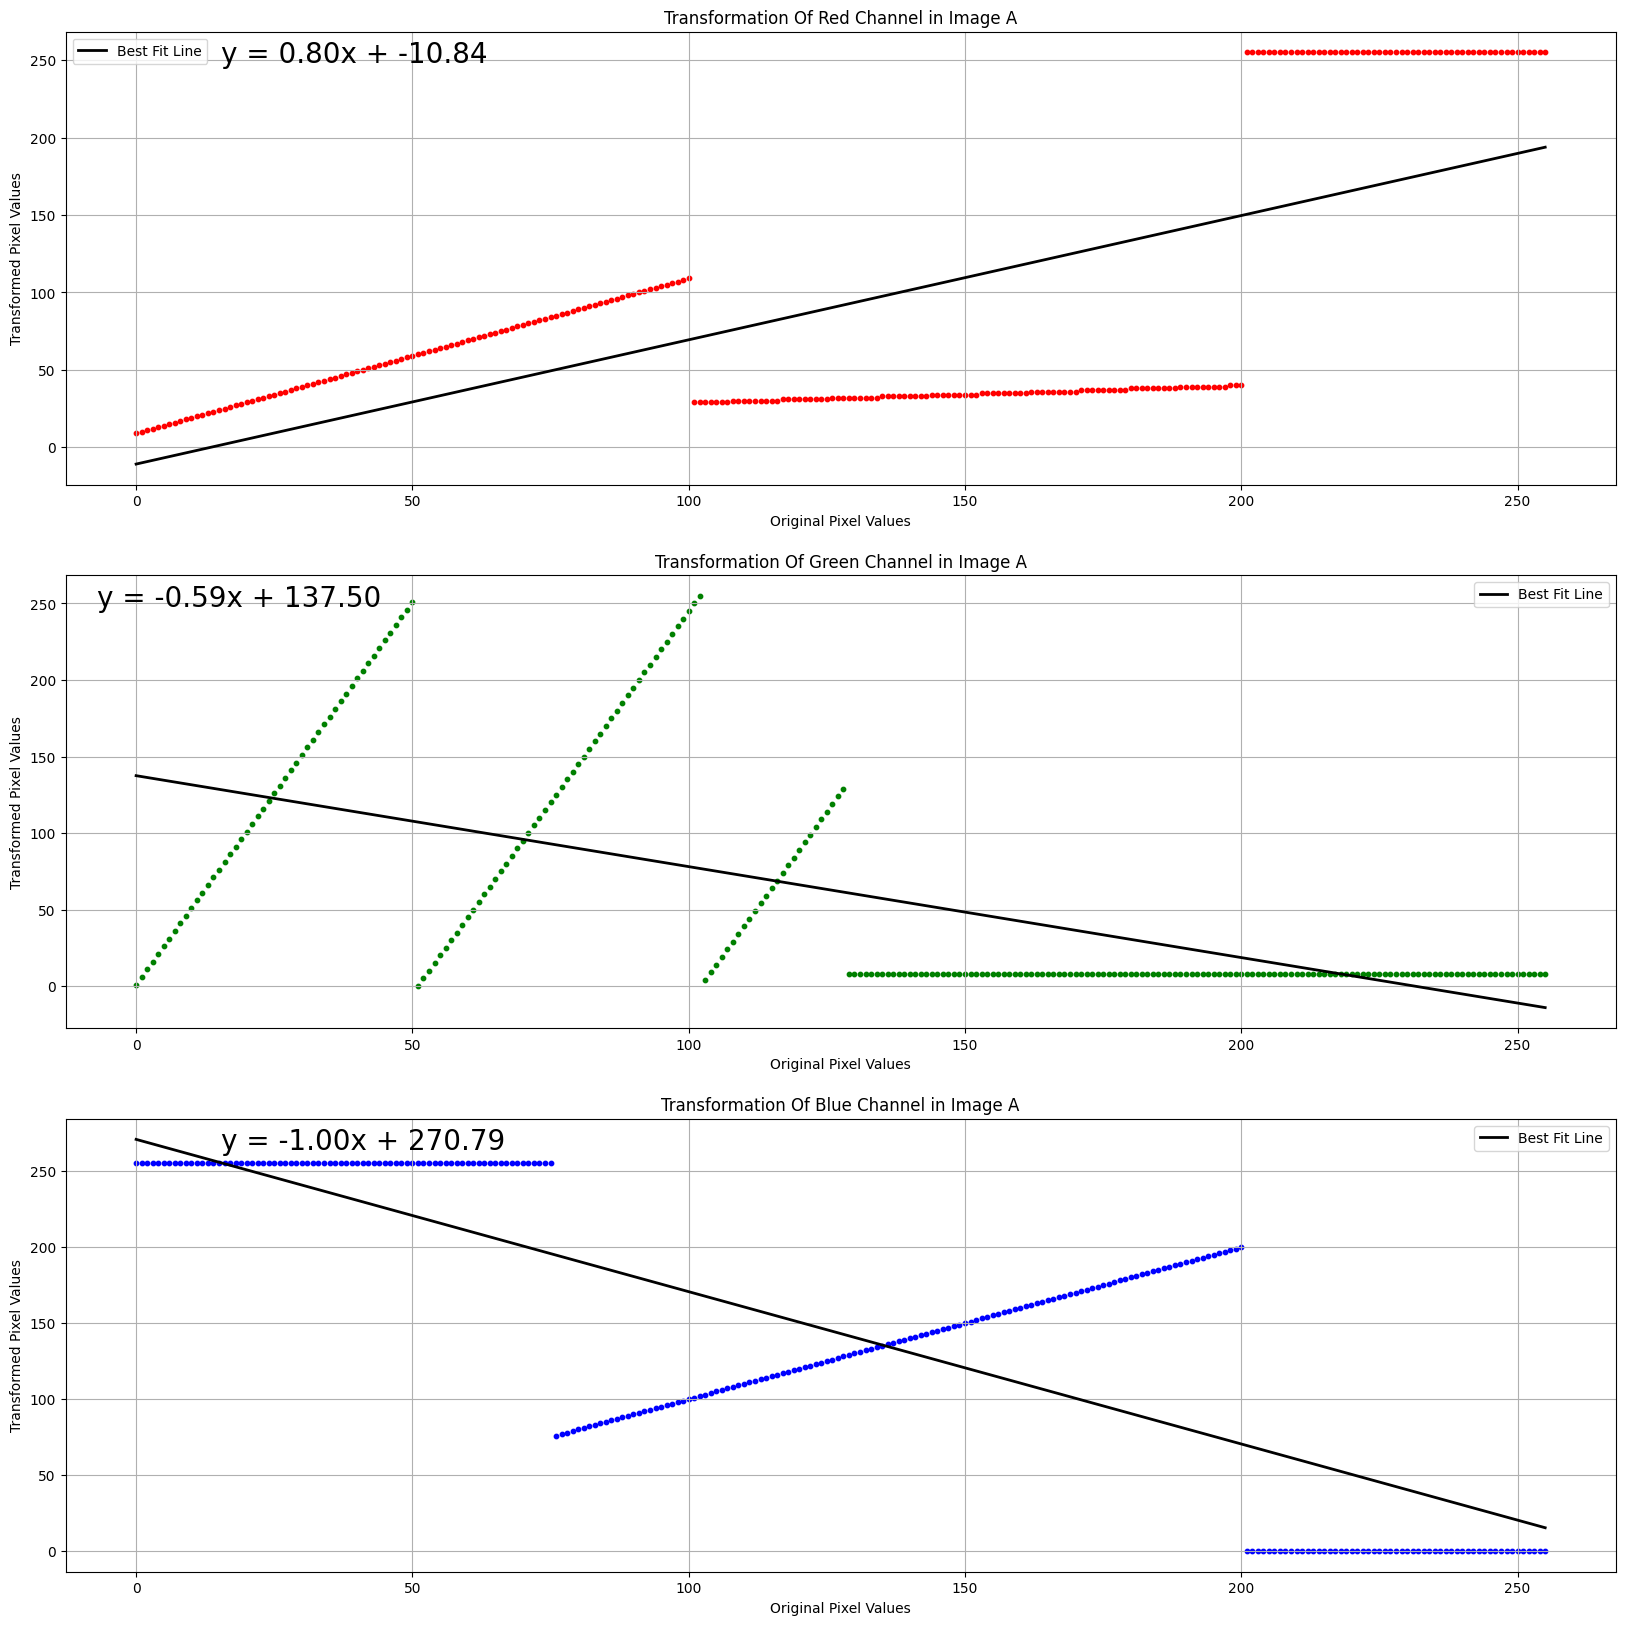

In [33]:
# Read A and transformed A
image_B = cv2.imread(B_path)
image_B = cv2.cvtColor(image_B, cv2.COLOR_BGR2RGB)

transformed_B = cv2.imread("../out_img/transformed_image_B.png")
transformed_B = cv2.cvtColor(transformed_B, cv2.COLOR_BGR2RGB)

# Plot input vs output pixel intensities for 3 separate channels with line of best fit
image_B_r = image_B[:,:,0]
image_B_g = image_B[:,:,1]
image_B_b = image_B[:,:,2]

transformed_B_r = transformed_B[:,:,0]
transformed_B_g = transformed_B[:,:,1]
transformed_B_b = transformed_B[:,:,2]

transformation_B_r = extract_transformation(image_B_r,transformed_B_r)
transformation_B_g = extract_transformation(image_B_g,transformed_B_g)
transformation_B_b = extract_transformation(image_B_b,transformed_B_b)

line_of_best_fits = [compute_line_of_best_fit(x) for x in [transformation_B_r,transformation_B_g,transformation_B_b]]

plt.figure(figsize=(20,20))

plt.subplot(3,1,1)
plt.scatter(transformation_B_r[0], transformation_B_r[1], color='red', marker='o',s=10)
line_x = np.linspace(min(transformation_B_r[0]), max(transformation_B_r[0]), 100)
slope = line_of_best_fits[0][0]
intercept = line_of_best_fits[0][1]
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')
plt.title("Transformation Of Red Channel in Image A")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.grid(True)
plt.legend()
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.1, 0.98, equation_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')

plt.subplot(3,1,2)
plt.scatter(transformation_B_g[0], transformation_B_g[1], color='green', marker='o',s=10)
line_x = np.linspace(min(transformation_B_g[0]), max(transformation_B_g[0]), 100)
slope = line_of_best_fits[1][0]
intercept = line_of_best_fits[1][1]
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')
plt.title("Transformation Of Green Channel in Image A")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.grid(True)
plt.legend()
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.02, 0.98, equation_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')

plt.subplot(3,1,3)
plt.scatter(transformation_B_b[0], transformation_B_b[1], color='blue', marker='o',s=10)
line_x = np.linspace(min(transformation_B_b[0]), max(transformation_B_b[0]), 100)
slope = line_of_best_fits[2][0]
intercept = line_of_best_fits[2][1]
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')
plt.title("Transformation Of Blue Channel in Image A")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.grid(True)
plt.legend()
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.1, 0.98, equation_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')

plt.show()

For green, we observe that when we plot the transformation directly, values from 50  to 128 go to 255. However when we consider input and output pixels, after 50 the transformation drops to 0.

The line of best fit tries to approximate the piece-wise function definition of transformation provided however from the plots it is evident that the approximation is not good enough.

### Subtask 4

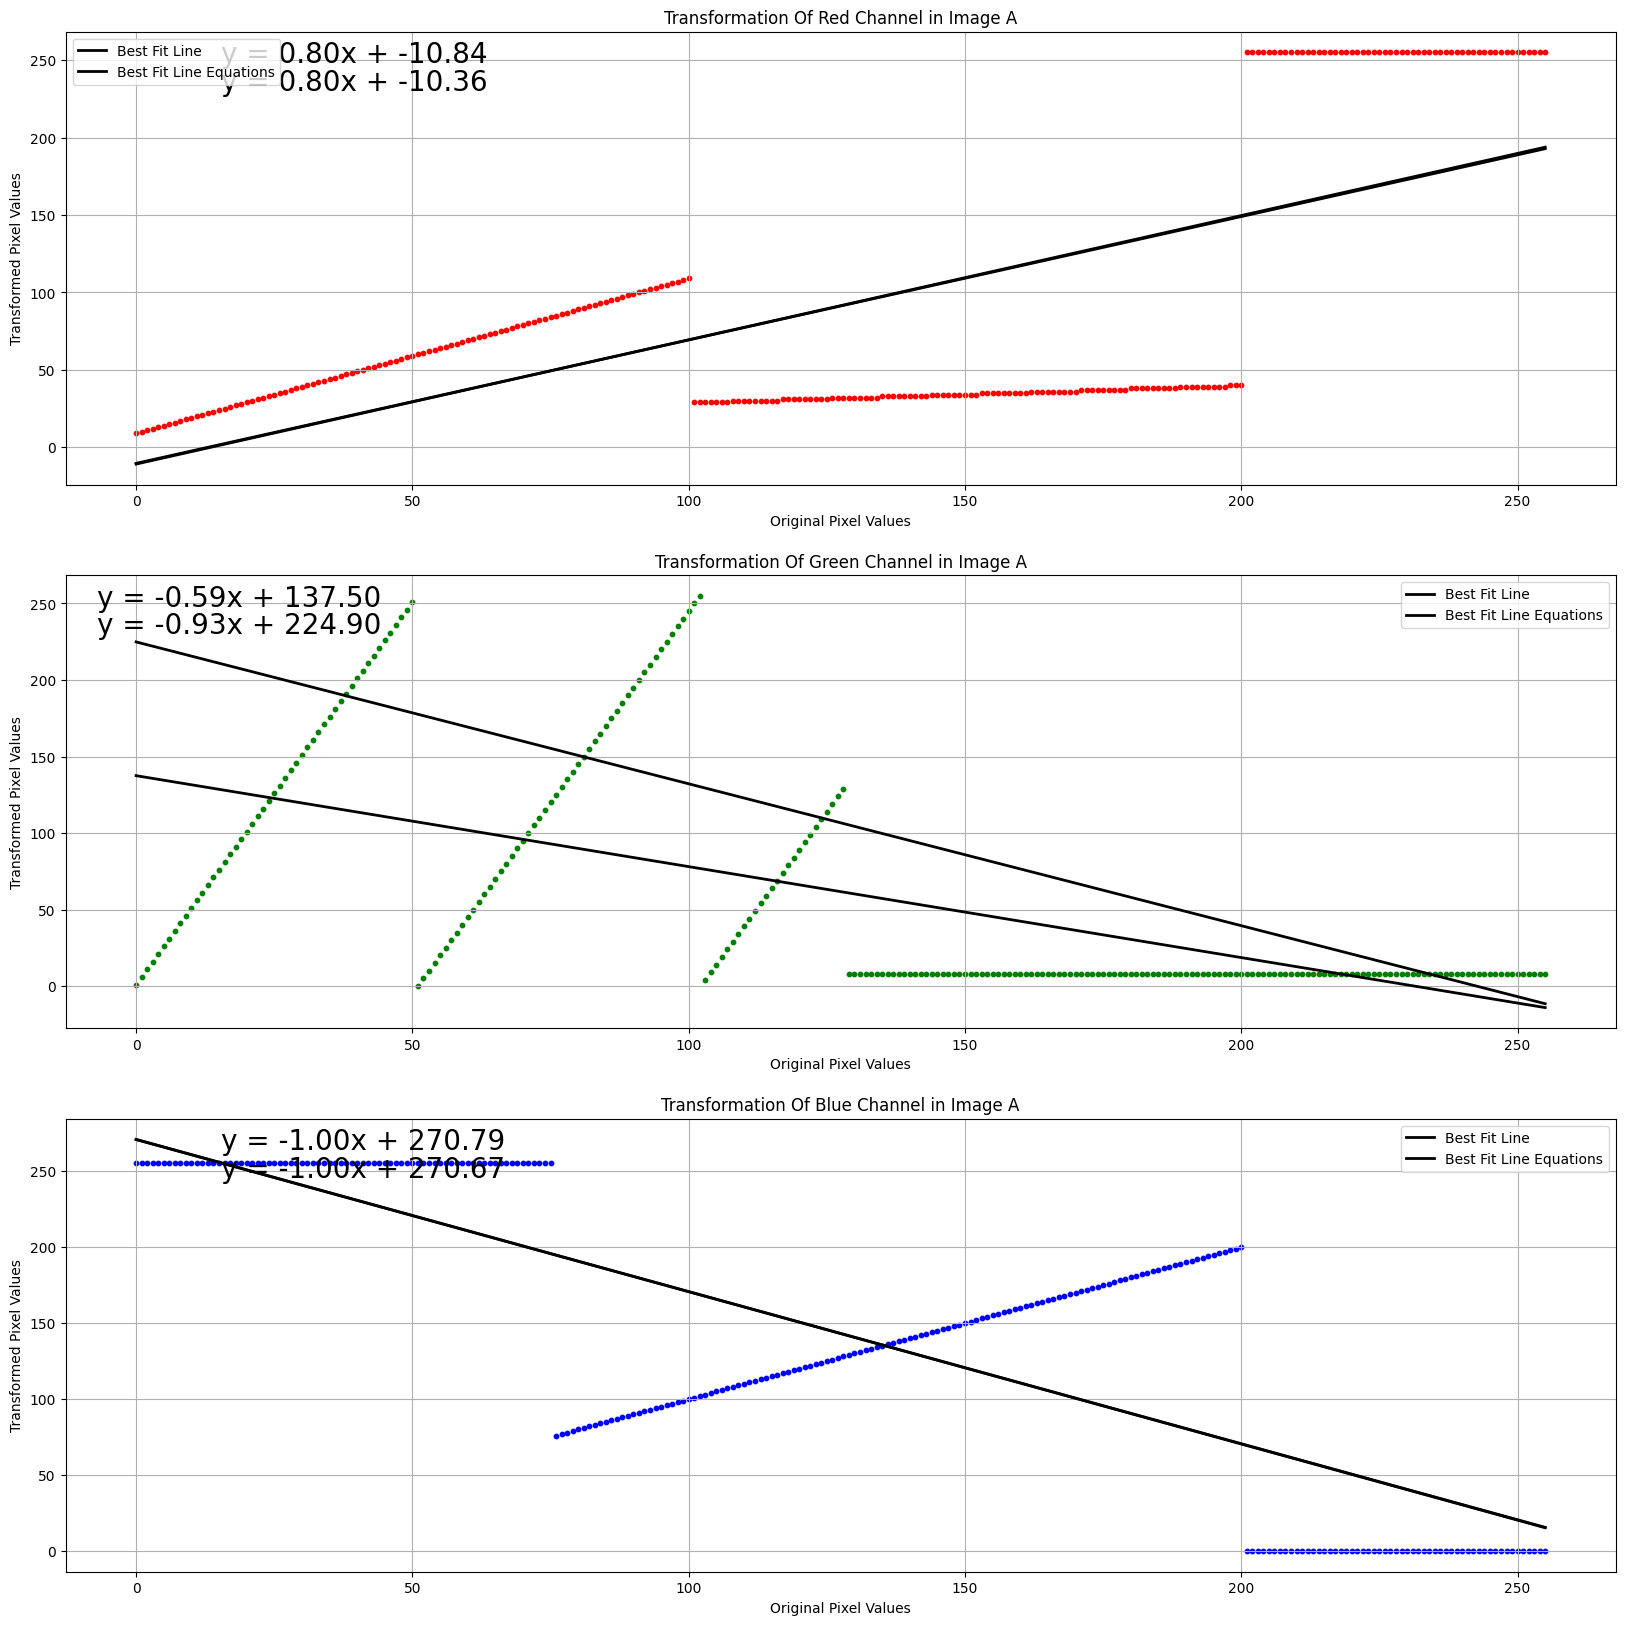

In [34]:
# Read A and transformed A
image_A = cv2.imread(A_path)
image_A = cv2.cvtColor(image_A, cv2.COLOR_BGR2RGB)

transformed_A = cv2.imread("../out_img/transformed_image_A.png")
transformed_A = cv2.cvtColor(transformed_A, cv2.COLOR_BGR2RGB)

# Plot input vs output pixel intensities for 3 separate channels with line of best fit
image_A_r = image_A[:,:,0]
image_A_g = image_A[:,:,1]
image_A_b = image_A[:,:,2]

transformed_A_r = transformed_A[:,:,0]
transformed_A_g = transformed_A[:,:,1]
transformed_A_b = transformed_A[:,:,2]

transformation_A_r = extract_transformation(image_A_r,transformed_A_r)
transformation_A_g = extract_transformation(image_A_g,transformed_A_g)
transformation_A_b = extract_transformation(image_A_b,transformed_A_b)

line_of_best_fits = [compute_line_of_best_fit(x) for x in [transformation_A_r,transformation_A_g,transformation_A_b]]

x = np.arange(0,255)
equation_trans_r = red_transformation(x,9)
equation_trans_g = green_transformation(x,9)
equation_trans_b = blue_transformation(x,9)

line_of_best_fit_trans_equation = [compute_line_of_best_fit(x) for x in [(x,equation_trans_r),(x,equation_trans_g),(x,equation_trans_b)]]

plt.figure(figsize=(20,20))

plt.subplot(3,1,1)
plt.scatter(transformation_A_r[0], transformation_A_r[1], color='red', marker='o',s=10)
line_x = np.linspace(min(transformation_A_r[0]), max(transformation_A_r[0]), 100)
slope = line_of_best_fits[0][0]
intercept = line_of_best_fits[0][1]
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')

line_x_eq = np.linspace(min(transformation_A_r[0]), max(transformation_A_r[0]), 100)
slope_eq = line_of_best_fit_trans_equation[0][0]
intercept_eq = line_of_best_fit_trans_equation[0][1]
line_y_eq = slope_eq * line_x_eq + intercept_eq
plt.plot(line_x_eq, line_y_eq, color='black', linestyle='-', linewidth=2, label='Best Fit Line Equations')

plt.title("Transformation Of Red Channel in Image A")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.grid(True)
plt.legend()
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
equation_text_eq = f'y = {slope_eq:.2f}x + {intercept_eq:.2f}'
plt.text(0.1, 0.98, equation_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')
plt.text(0.1, 0.92, equation_text_eq, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')


plt.subplot(3,1,2)
plt.scatter(transformation_A_g[0], transformation_A_g[1], color='green', marker='o',s=10)
line_x = np.linspace(min(transformation_A_g[0]), max(transformation_A_g[0]), 100)
slope = line_of_best_fits[1][0]
intercept = line_of_best_fits[1][1]
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')

line_x_eq = np.linspace(min(transformation_A_g[0]), max(transformation_A_g[0]), 100)
slope_eq = line_of_best_fit_trans_equation[1][0]
intercept_eq = line_of_best_fit_trans_equation[1][1]
line_y_eq = slope_eq * line_x_eq + intercept_eq
plt.plot(line_x_eq, line_y_eq, color='black', linestyle='-', linewidth=2, label='Best Fit Line Equations')

plt.title("Transformation Of Green Channel in Image A")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.grid(True)
plt.legend()
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
equation_text_eq = f'y = {slope_eq:.2f}x + {intercept_eq:.2f}'
plt.text(0.02, 0.98, equation_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')
plt.text(0.02, 0.92, equation_text_eq, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')


plt.subplot(3,1,3)
plt.scatter(transformation_A_b[0], transformation_A_b[1], color='blue', marker='o',s=10)
line_x = np.linspace(min(transformation_A_b[0]), max(transformation_A_b[0]), 100)
slope = line_of_best_fits[2][0]
intercept = line_of_best_fits[2][1]
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')

line_x_eq = np.linspace(min(transformation_A_b[0]), max(transformation_A_b[0]), 100)
slope_eq = line_of_best_fit_trans_equation[2][0]
intercept_eq = line_of_best_fit_trans_equation[2][1]
line_y_eq = slope_eq * line_x_eq + intercept_eq

plt.plot(line_x_eq, line_y_eq, color='black', linestyle='-', linewidth=2, label='Best Fit Line Equations')
plt.title("Transformation Of Blue Channel in Image A")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.grid(True)
plt.legend()
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
equation_text_eq = f'y = {slope_eq:.2f}x + {intercept_eq:.2f}'

plt.text(0.1, 0.98, equation_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')
plt.text(0.1, 0.92, equation_text_eq, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')


plt.show()

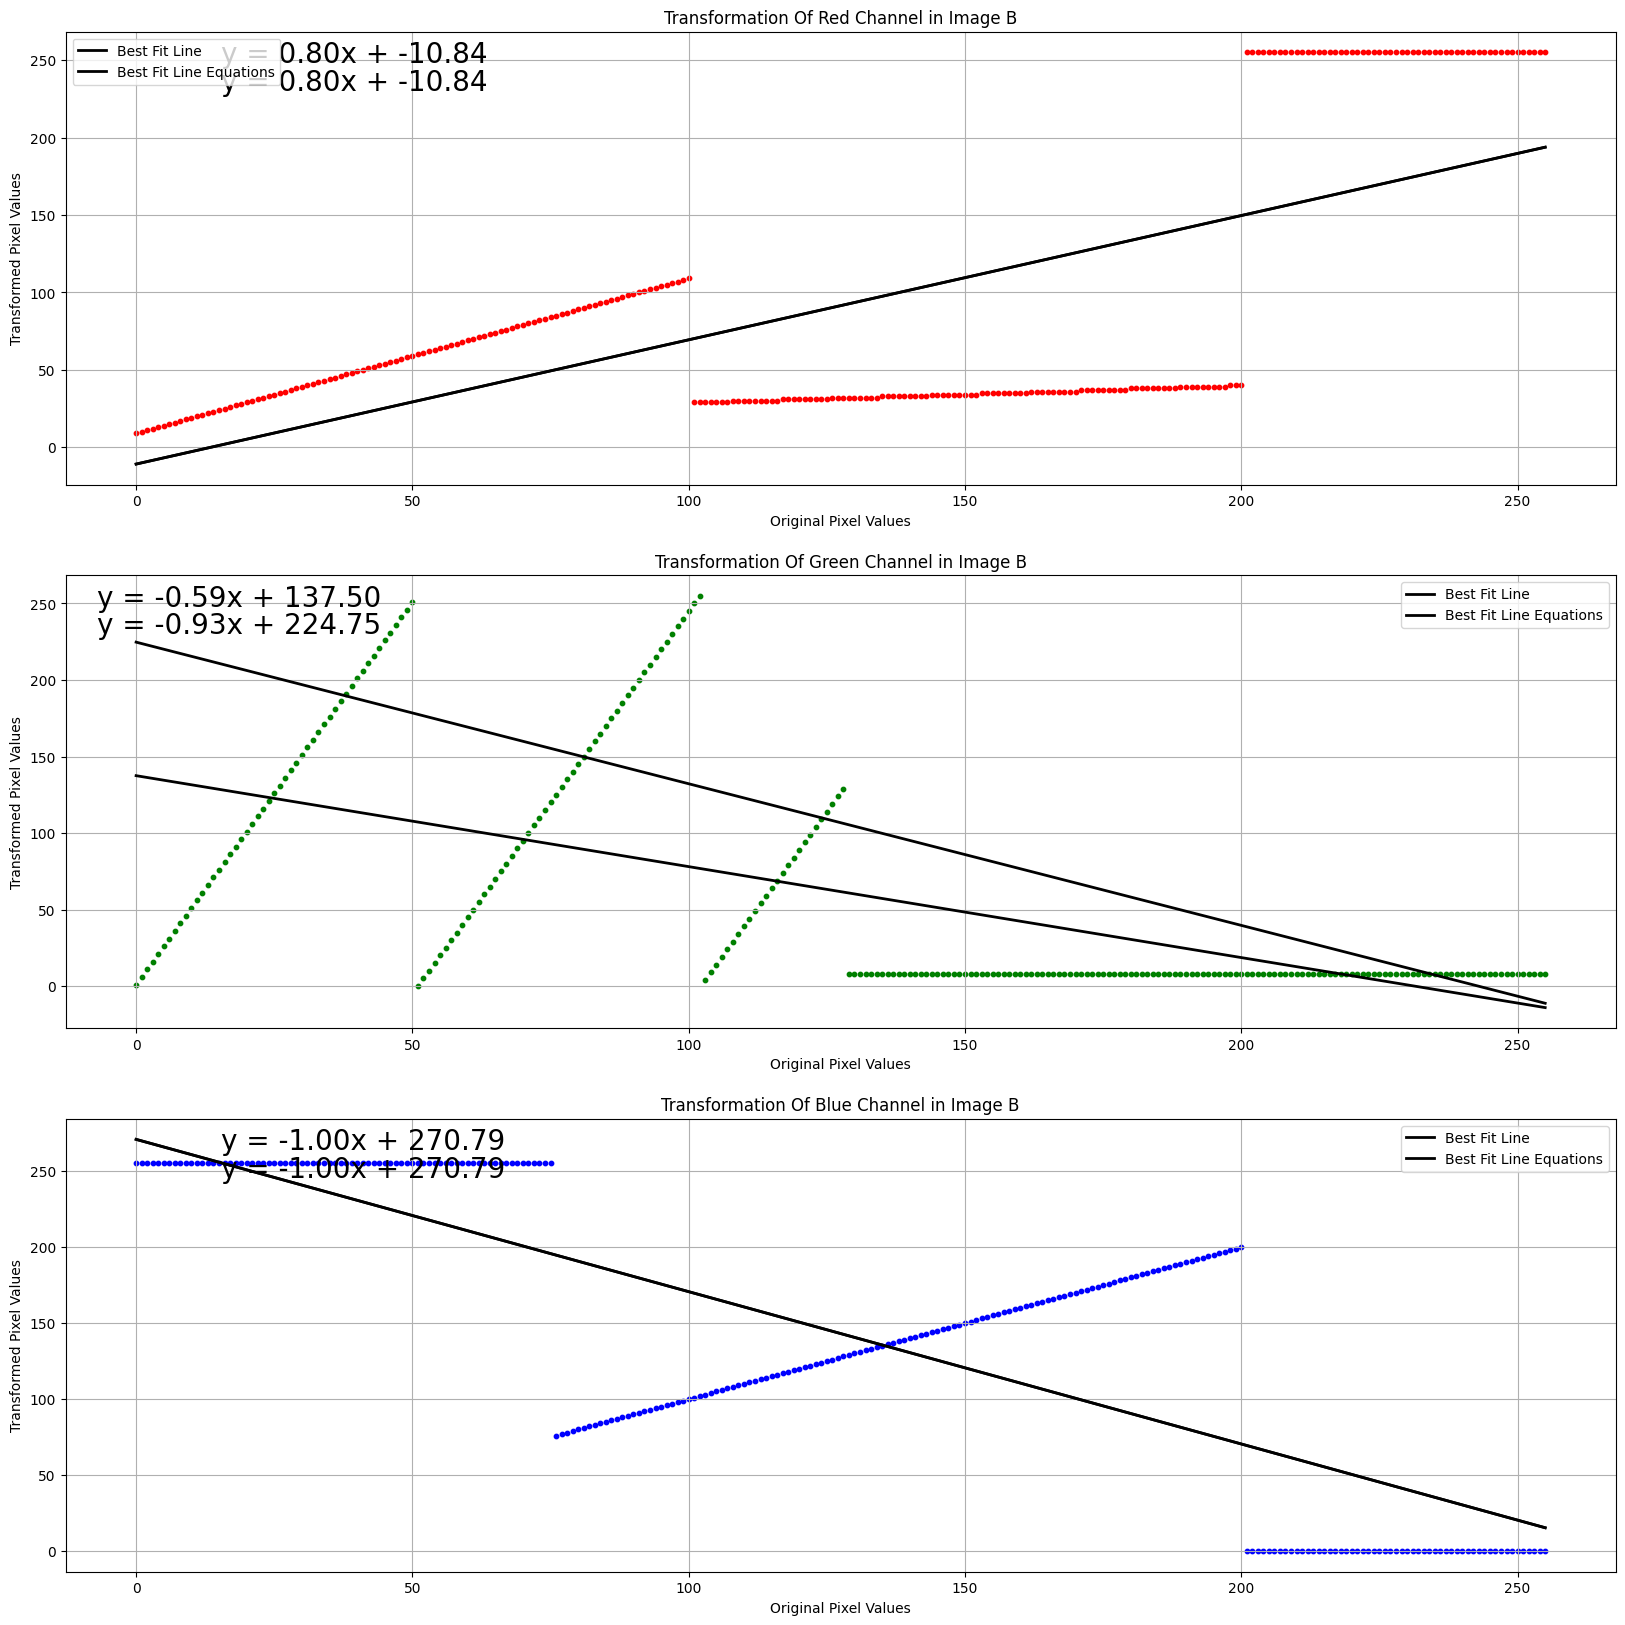

In [35]:
# Read B and transformed B
image_B = cv2.imread(B_path)
image_B = cv2.cvtColor(image_B, cv2.COLOR_BGR2RGB)

transformed_B = cv2.imread("../out_img/transformed_image_B.png")
transformed_B = cv2.cvtColor(transformed_B, cv2.COLOR_BGR2RGB)

# Plot input vs output pixel intensities for 3 separate channels with line of best fit
image_B_r = image_B[:,:,0]
image_B_g = image_B[:,:,1]
image_B_b = image_B[:,:,2]

transformed_B_r = transformed_B[:,:,0]
transformed_B_g = transformed_B[:,:,1]
transformed_B_b = transformed_B[:,:,2]

transformation_B_r = extract_transformation(image_B_r,transformed_B_r)
transformation_B_g = extract_transformation(image_B_g,transformed_B_g)
transformation_B_b = extract_transformation(image_B_b,transformed_B_b)

line_of_best_fits = [compute_line_of_best_fit(x) for x in [transformation_B_r,transformation_B_g,transformation_B_b]]

x = np.arange(0,256)
equation_trans_r = red_transformation(x,9)
equation_trans_g = green_transformation(x,9)
equation_trans_b = blue_transformation(x,9)

line_of_best_fit_trans_equation = [compute_line_of_best_fit(x) for x in [(x,equation_trans_r),(x,equation_trans_g),(x,equation_trans_b)]]

plt.figure(figsize=(20,20))

plt.subplot(3,1,1)
plt.scatter(transformation_B_r[0], transformation_B_r[1], color='red', marker='o',s=10)
line_x = np.linspace(min(transformation_B_r[0]), max(transformation_B_r[0]), 100)
slope = line_of_best_fits[0][0]
intercept = line_of_best_fits[0][1]
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')

line_x_eq = np.linspace(min(transformation_B_r[0]), max(transformation_B_r[0]), 100)
slope_eq = line_of_best_fit_trans_equation[0][0]
intercept_eq = line_of_best_fit_trans_equation[0][1]
line_y_eq = slope_eq * line_x_eq + intercept_eq
plt.plot(line_x_eq, line_y_eq, color='black', linestyle='-', linewidth=2, label='Best Fit Line Equations')

plt.title("Transformation Of Red Channel in Image B")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.grid(True)
plt.legend()
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
equation_text_eq = f'y = {slope_eq:.2f}x + {intercept_eq:.2f}'
plt.text(0.1, 0.98, equation_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')
plt.text(0.1, 0.92, equation_text_eq, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')


plt.subplot(3,1,2)
plt.scatter(transformation_B_g[0], transformation_B_g[1], color='green', marker='o',s=10)
line_x = np.linspace(min(transformation_B_g[0]), max(transformation_B_g[0]), 100)
slope = line_of_best_fits[1][0]
intercept = line_of_best_fits[1][1]
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')

line_x_eq = np.linspace(min(transformation_B_g[0]), max(transformation_B_g[0]), 100)
slope_eq = line_of_best_fit_trans_equation[1][0]
intercept_eq = line_of_best_fit_trans_equation[1][1]
line_y_eq = slope_eq * line_x_eq + intercept_eq
plt.plot(line_x_eq, line_y_eq, color='black', linestyle='-', linewidth=2, label='Best Fit Line Equations')

plt.title("Transformation Of Green Channel in Image B")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.grid(True)
plt.legend()
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
equation_text_eq = f'y = {slope_eq:.2f}x + {intercept_eq:.2f}'
plt.text(0.02, 0.98, equation_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')
plt.text(0.02, 0.92, equation_text_eq, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')


plt.subplot(3,1,3)
plt.scatter(transformation_B_b[0], transformation_B_b[1], color='blue', marker='o',s=10)
line_x = np.linspace(min(transformation_B_b[0]), max(transformation_B_b[0]), 100)
slope = line_of_best_fits[2][0]
intercept = line_of_best_fits[2][1]
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')

line_x_eq = np.linspace(min(transformation_B_b[0]), max(transformation_B_b[0]), 100)
slope_eq = line_of_best_fit_trans_equation[2][0]
intercept_eq = line_of_best_fit_trans_equation[2][1]
line_y_eq = slope_eq * line_x_eq + intercept_eq

plt.plot(line_x_eq, line_y_eq, color='black', linestyle='-', linewidth=2, label='Best Fit Line Equations')
plt.title("Transformation Of Blue Channel in Image B")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.grid(True)
plt.legend()
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
equation_text_eq = f'y = {slope_eq:.2f}x + {intercept_eq:.2f}'

plt.text(0.1, 0.98, equation_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')
plt.text(0.1, 0.92, equation_text_eq, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')


plt.show()

- Since the image has pixels of all intensities, the line of best fit from the image and directly from the equations is the same. If the image would not have some pixel intensities then the points would be concentrated towards one end instead of uniform distribution thus giving a line of best fit according to that. Line of best fit from the transformation equations will always be uniform. The difference between the two gratly depends on distribution of pixel intensities in our original image in RGB channels.
- In above figure we see that only for green the lines differ. This is due to variation in input and output pixels. In transformation equations, the green pixels between 50-128 map to 255 but in the image they go down to 0.

### Subtask 5

In [36]:
def red_linear_trans(x):
    return 0.80*x - 10.84

def green_linear_trans(x):
    return  137.50 - (0.59)*x 

def blue_linear_trans(x):
    return 270.79 - x

In [37]:
def red_transformation_linear(image):
    red_channel = image[:,:,0]
    red_channel_transformed = np.empty_like(red_channel)
    red_channel_transformed = red_channel_transformed.astype(np.uint16)
    red_channel_transformed = red_linear_trans(red_channel)
    red_channel_transformed = np.clip(red_channel_transformed,0,255).astype(np.uint8)
    return red_channel_transformed

In [38]:
def green_transformation_linear(image):
    green_channel = image[:,:,1]
    green_channel_transformed = np.empty_like(green_channel)
    green_channel_transformed = green_channel_transformed.astype(np.uint16)
    green_channel_transformed = green_linear_trans(green_channel)
    green_channel_transformed = np.clip(green_channel_transformed,0,255).astype(np.uint8)
    return green_channel_transformed

In [39]:
def blue_transformation_linear(image):
    blue_channel = image[:,:,2]
    blue_channel_transformed = np.empty_like(blue_channel)
    blue_channel_transformed = blue_channel_transformed.astype(np.uint16)
    blue_channel_transformed = blue_linear_trans(blue_channel)
    blue_channel_transformed = np.clip(blue_channel_transformed,0,255).astype(np.uint8)
    return blue_channel_transformed

In [40]:
def transform_image_linear(image):
    red_transformed = red_transformation_linear(image)
    green_transformed = green_transformation_linear(image)
    blue_transformed = blue_transformation_linear(image)

    transformed_image = np.stack((red_transformed,green_transformed,blue_transformed),axis=-1)
    return transformed_image

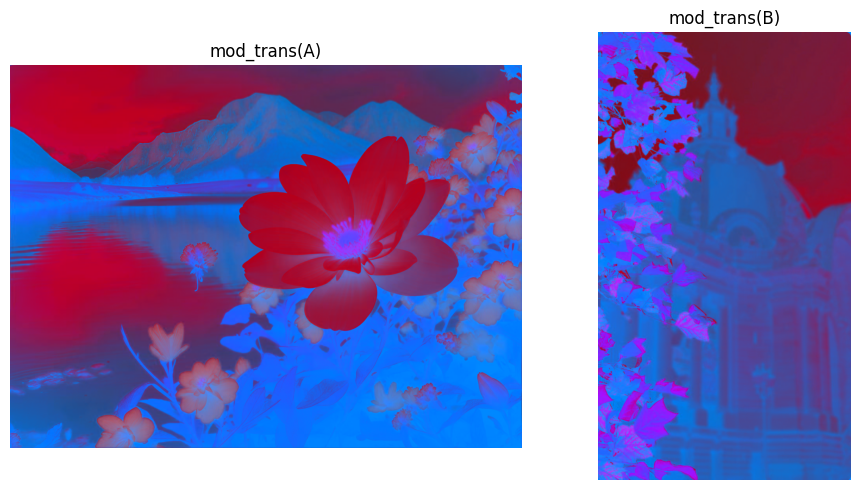

In [41]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
image_A_after_transformation = transform_image_linear(A_img)
plt.imshow(image_A_after_transformation)
cv2.imwrite(f"../out_img/mod_transformed_image_A.png",cv2.cvtColor(image_A_after_transformation,cv2.COLOR_RGB2BGR))
plt.title("mod_trans(A)")
plt.axis('off')

plt.subplot(1,2,2)
image_B_after_transformation = transform_image_linear(B_img)
plt.imshow(image_B_after_transformation)
cv2.imwrite(f"../out_img/mod_transformed_image_B.png",cv2.cvtColor(image_B_after_transformation,cv2.COLOR_RGB2BGR))
plt.title("mod_trans(B)")
plt.axis('off')

plt.tight_layout()
plt.show()

### Subtask 6

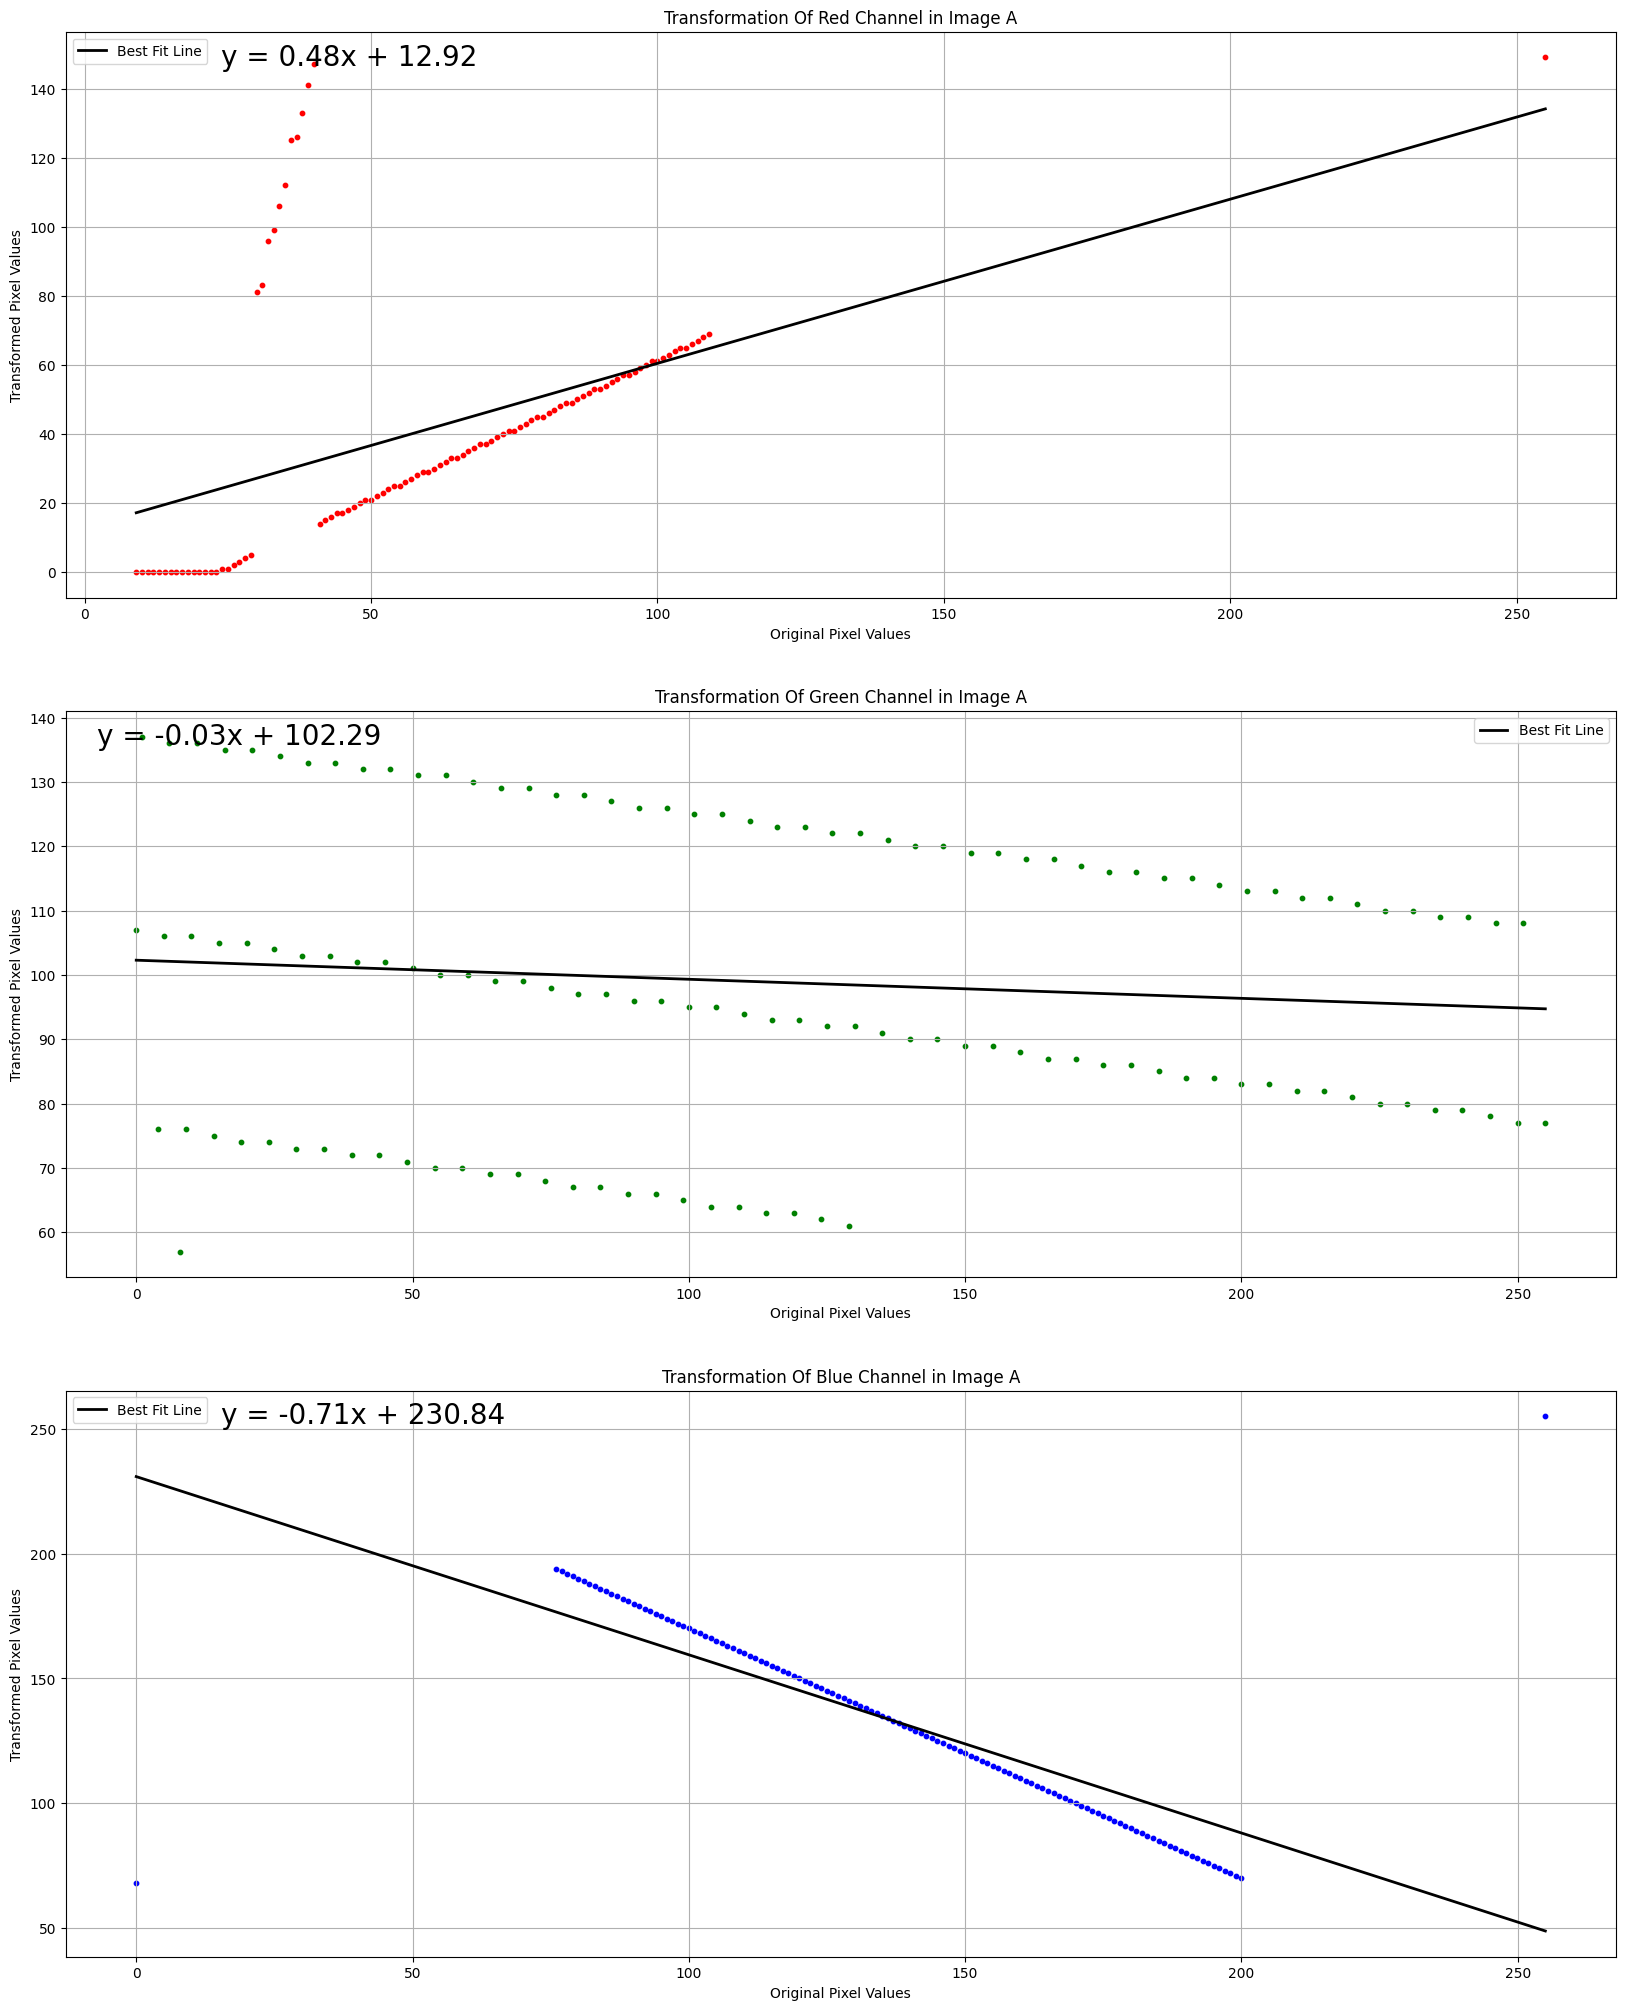

In [42]:
transformed_A = cv2.imread("../out_img/transformed_image_A.png")
transformed_A = cv2.cvtColor(transformed_A, cv2.COLOR_BGR2RGB)

transformed_B = cv2.imread("../out_img/transformed_image_B.png")
transformed_B = cv2.cvtColor(transformed_B, cv2.COLOR_BGR2RGB)

mod_trans_A = cv2.imread("../out_img/mod_transformed_image_A.png")
mod_trans_A = cv2.cvtColor(mod_trans_A,cv2.COLOR_BGR2RGB)

mod_trans_B = cv2.imread("../out_img/mod_transformed_image_B.png")
mod_trans_B = cv2.cvtColor(mod_trans_B,cv2.COLOR_BGR2RGB)

orig_A_red = transformed_A[:,:,0]
orig_A_green = transformed_A[:,:,1]
orig_A_blue = transformed_A[:,:,2]

trans_A_red_channel = mod_trans_A[:,:,0]
trans_A_green_channel = mod_trans_A[:,:,1]
trans_A_blue_channel = mod_trans_A[:,:,2]

red_trans_A = extract_transformation(orig_A_red,trans_A_red_channel)
green_trans_A = extract_transformation(orig_A_green,trans_A_green_channel)
blue_trans_A = extract_transformation(orig_A_blue,trans_A_blue_channel)

plt.figure(figsize=(20, 25))

plt.subplot(3,1,1)
plt.scatter(red_trans_A[0], red_trans_A[1], color='red', marker='o',s=10)
slope,intercept = compute_line_of_best_fit(red_trans_A)
line_x = np.linspace(min(red_trans_A[0]), max(red_trans_A[0]), 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')
plt.title("Transformation Of Red Channel in Image A")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.legend()
plt.grid(True)
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.1, 0.98, equation_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')

plt.subplot(3,1,2)
plt.scatter(green_trans_A[0], green_trans_A[1], color='green', marker='o',s=10)
slope,intercept = compute_line_of_best_fit(green_trans_A)
line_x = np.linspace(min(green_trans_A[0]), max(green_trans_A[0]), 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')
plt.title("Transformation Of Green Channel in Image A")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.legend()
plt.grid(True)
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.02, 0.98, equation_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')

plt.subplot(3,1,3)
plt.scatter(blue_trans_A[0], blue_trans_A[1], color='blue', marker='o',s=10)
slope,intercept = compute_line_of_best_fit(blue_trans_A)
line_x = np.linspace(min(blue_trans_A[0]), max(blue_trans_A[0]), 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')
plt.title("Transformation Of Blue Channel in Image A")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.legend()
plt.grid(True)
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.1, 0.98, equation_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')

plt.show()

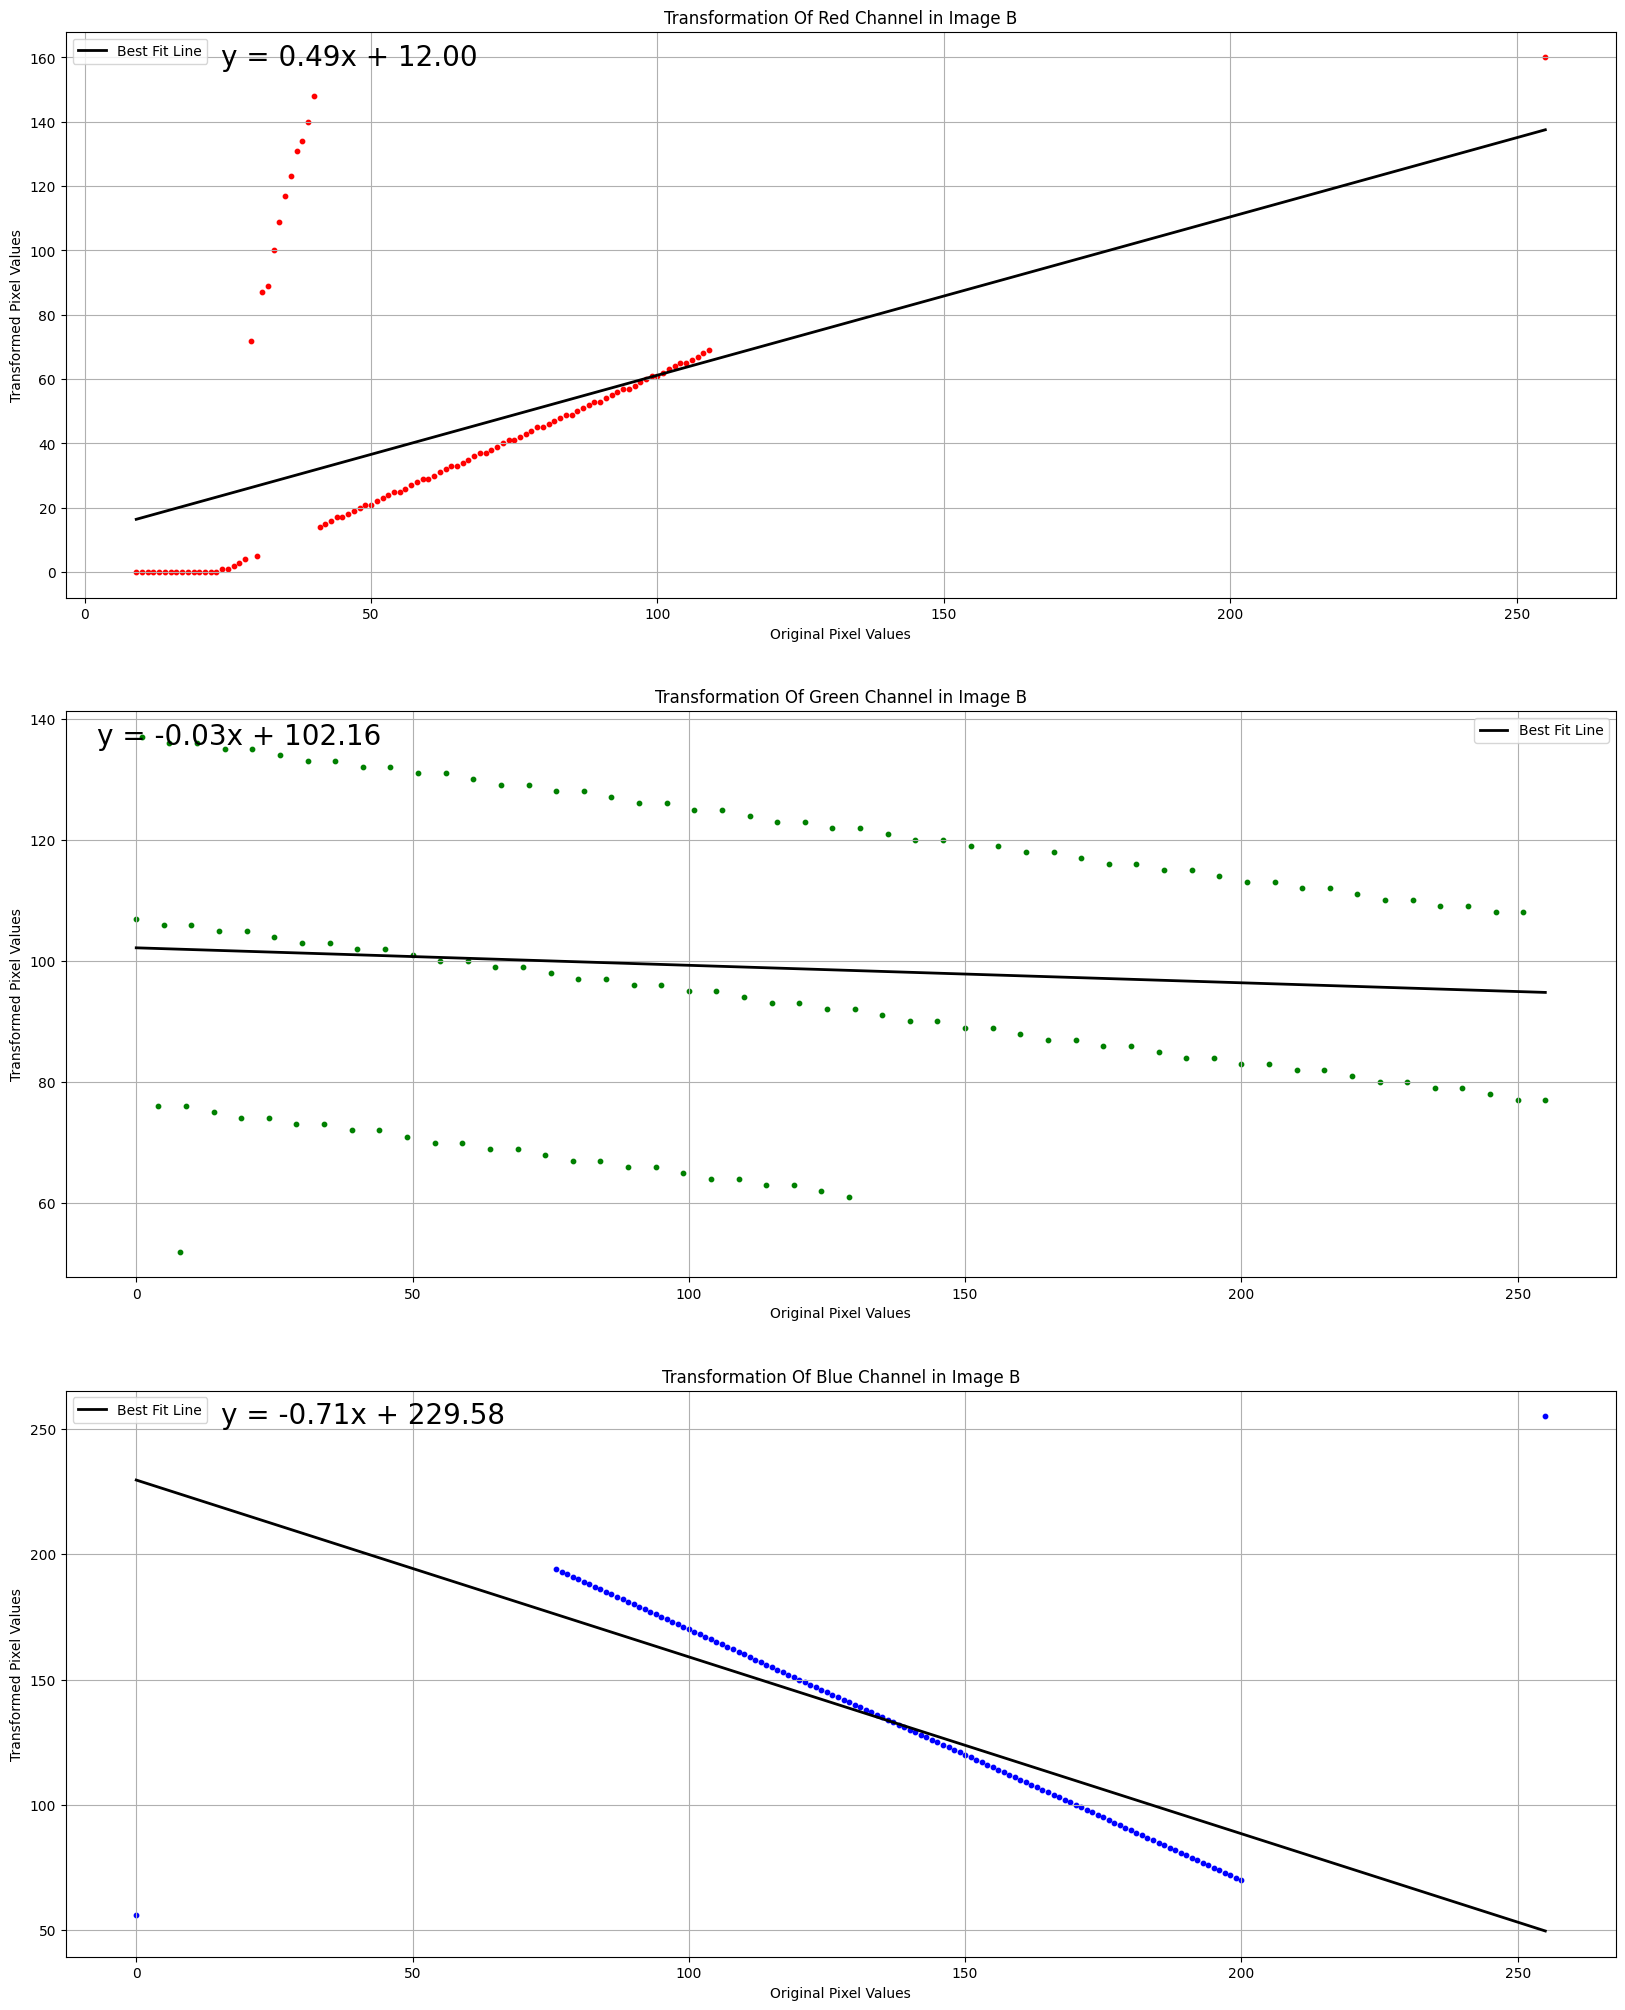

In [43]:
orig_B_red = transformed_B[:,:,0]
orig_B_green = transformed_B[:,:,1]
orig_B_blue = transformed_B[:,:,2]

trans_B_red_channel = mod_trans_B[:,:,0]
trans_B_green_channel = mod_trans_B[:,:,1]
trans_B_blue_channel = mod_trans_B[:,:,2]

red_trans_B = extract_transformation(orig_B_red,trans_B_red_channel)
green_trans_B = extract_transformation(orig_B_green,trans_B_green_channel)
blue_trans_B = extract_transformation(orig_B_blue,trans_B_blue_channel)

plt.figure(figsize=(20, 25))

plt.subplot(3,1,1)
plt.scatter(red_trans_B[0], red_trans_B[1], color='red', marker='o',s=10)
slope,intercept = compute_line_of_best_fit(red_trans_B)
line_x = np.linspace(min(red_trans_B[0]), max(red_trans_B[0]), 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')
plt.title("Transformation Of Red Channel in Image B")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.legend()
plt.grid(True)
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.1, 0.98, equation_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')

plt.subplot(3,1,2)
plt.scatter(green_trans_B[0], green_trans_B[1], color='green', marker='o',s=10)
slope,intercept = compute_line_of_best_fit(green_trans_B)
line_x = np.linspace(min(green_trans_B[0]), max(green_trans_B[0]), 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')
plt.title("Transformation Of Green Channel in Image B")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.legend()
plt.grid(True)
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.02, 0.98, equation_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')

plt.subplot(3,1,3)
plt.scatter(blue_trans_B[0], blue_trans_B[1], color='blue', marker='o',s=10)
slope,intercept = compute_line_of_best_fit(blue_trans_B)
line_x = np.linspace(min(blue_trans_B[0]), max(blue_trans_B[0]), 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='black', linestyle='-', linewidth=2, label='Best Fit Line')
plt.title("Transformation Of Blue Channel in Image B")
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.legend()
plt.grid(True)
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.1, 0.98, equation_text, transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')

plt.show()

### Subtask 7

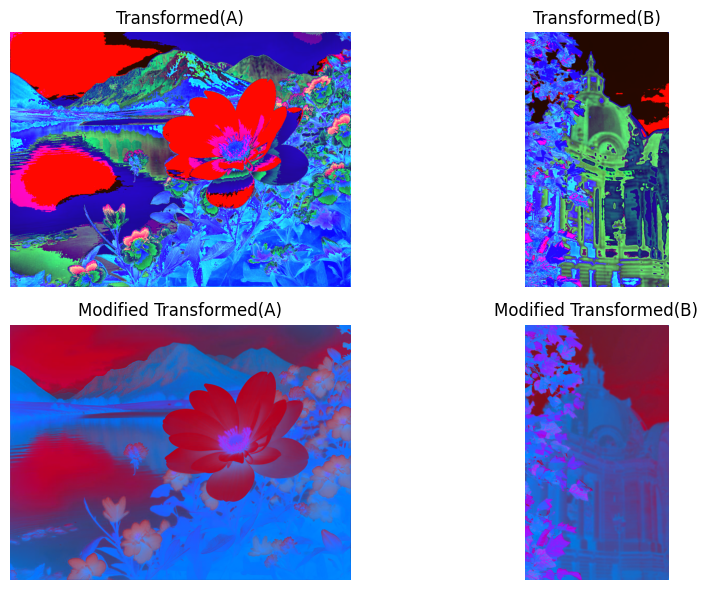

In [44]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.imshow(transformed_A)
plt.title("Transformed(A)")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(transformed_B)
plt.title("Transformed(B)")
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(mod_trans_A)
plt.title("Modified Transformed(A)")
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(mod_trans_B)
plt.title("Modified Transformed(B)")
plt.axis('off')

plt.tight_layout()
plt.show()

Yes, this transformation can be called a filter as the green pixels are totally filtered out between the transformed(x) and mod_trans(x). Hence this transformation is a type of color channel filter also called channel blocking filter or channel zeroing or color filter mask.